**

## Time Series Project




# Dataset Description

This dataset contains information on the average temperature and average temperature uncertainty for various cities and countries around the world. The data is presented in a tabular format with the following columns:

## Columns
- **dt**: Date in yyyy-mm-dd format
- **AverageTemperature**: Average temperature in degrees Celsius
- **AverageTemperatureUncertainty**: Average temperature uncertainty in tenths of a degree Celsius
- **City**: City name
- **Country**: Country name
- **Latitude**: Latitude coordinate of the city
- **Longitude**: Longitude coordinate of the city

The dataset includes data for multiple years and seasons, which allows for analysis of temperature trends over time. The latitude and longitude values provide geospatial information, which can be used to visualize the data on a map.

This dataset could be useful for climate scientists, researchers, and policymakers interested in studying global temperature trends and patterns.

In [1]:
data <- read.csv("GlobalLandTemperaturesByCity.csv")

In [2]:
head(data)

dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1743-11-01,6.068,1.737,Ã…rhus,Denmark,57.05N,10.33E
1743-12-01,NA,NA,Ã…rhus,Denmark,57.05N,10.33E
1744-01-01,NA,NA,Ã…rhus,Denmark,57.05N,10.33E
1744-02-01,NA,NA,Ã…rhus,Denmark,57.05N,10.33E
1744-03-01,NA,NA,Ã…rhus,Denmark,57.05N,10.33E
1744-04-01,5.788,3.624,Ã…rhus,Denmark,57.05N,10.33E


In [4]:
(length(which(is.na(data$Longitude)==TRUE))/length(data$Longitude))*100

[1] 0

In [5]:
(length(which(is.na(data$AverageTemperature)==TRUE))/length(data$AverageTemperature))*100

[1] 4.234458

In [6]:
AT=replace(data$AverageTemperature, which(is.na(data$AverageTemperature)==TRUE),values = median(data$AverageTemperature,na.rm = TRUE))

In [7]:
ATU=replace(data$AverageTemperatureUncertainty, which(is.na(data$AverageTemperatureUncertainty)==TRUE),values = median(data$AverageTemperatureUncertainty,na.rm = TRUE))

In [8]:
data$AverageTemperature =AT
data$AverageTemperatureUncertainty =ATU

## outlier imputation

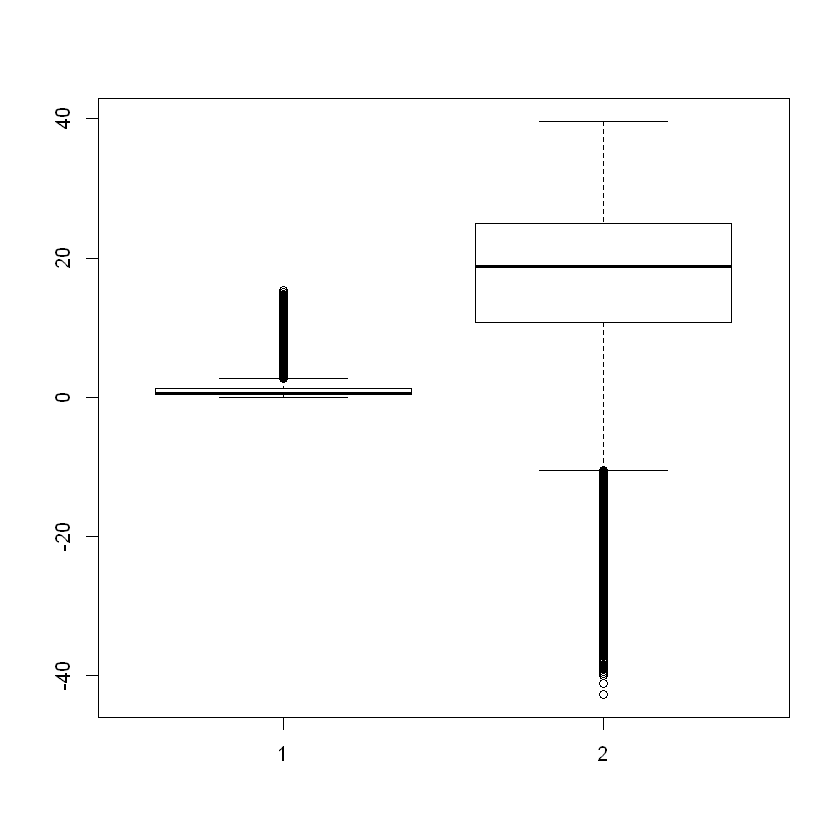

In [42]:
boxplot(data$AverageTemperatureUncertainty,data$AverageTemperature)

In [9]:
Q1 <- quantile(data$AverageTemperature,.25)
Q3 <- quantile(data$AverageTemperature, .75)

Up = unname(Q3) +1.5*(unname(Q3)-unname(Q1))
Lp = unname(Q1) -1.5*(unname(Q3)-unname(Q1))

#data$AverageTemperature <- replace(data$AverageTemperature, which (data$AverageTemperature >Q3),values = Up)
#data$AverageTemperature <- replace(data$AverageTemperature, which (data$AverageTemperature <Q1),values = Lp)

Q1 <- quantile(data$AverageTemperatureUncertainty, .25)

Q3 <- quantile(data$AverageTemperatureUncertainty, .75)

Up = unname(Q3) +1.5*(unname(Q3)-unname(Q1))
Lp = unname(Q1) -1.5*(unname(Q3)-unname(Q1))


#data$AverageTemperatureUncertainty <- replace(data$AverageTemperatureUncertainty, which (data$AverageTemperatureUncertainty >Q3),values = Up)
#data$AverageTemperatureUncertainty <- replace(data$AverageTemperatureUncertainty, which (data$AverageTemperatureUncertainty <Q1),values = Lp)


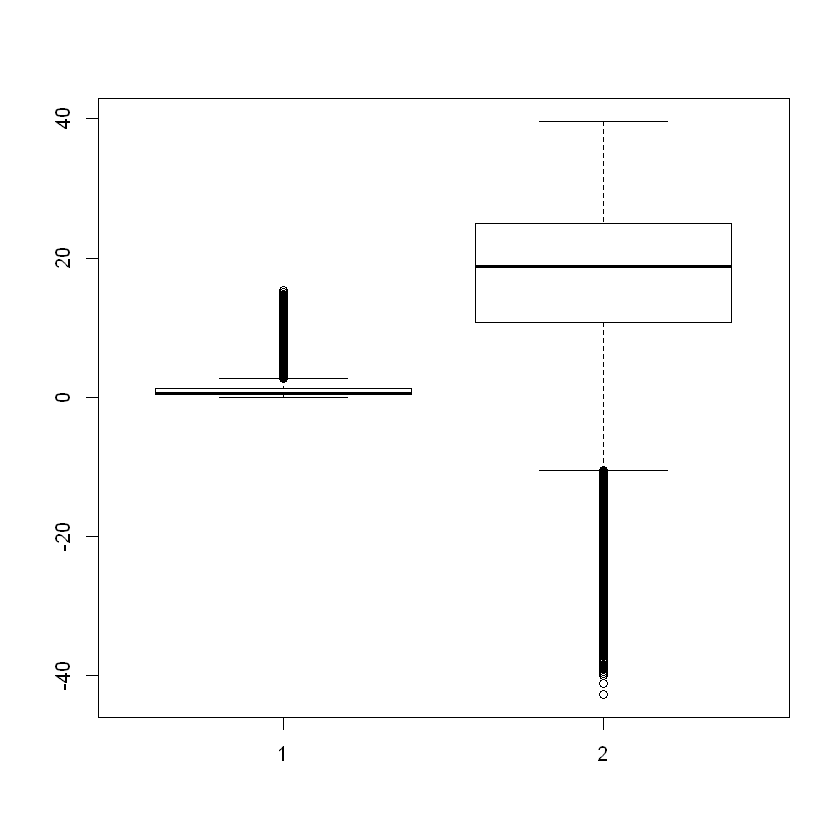

In [10]:
boxplot(data$AverageTemperatureUncertainty,data$AverageTemperature)

In [11]:
AT.ts<-ts(data$AverageTemperature,start=c(1743,11),frequency =12)

In [12]:
ATU.ts<-ts(data$AverageTemperatureUncertainty,start=c(1743,11),frequency =12, )

In [44]:
which(data$City=="Ã–skemen")

[1]  897574  899277  900981  902685  904389  906093  907797  909501  911205
  [10]  912909  914613  916317  918021  919725  921429  923133  924841  926549
  [19]  928257  929965  931673  933381  935089  936797  938505  940213  941921
  [28]  943629  945337  947045  948774  950503  952232  953961  955690  957422
  [37]  959154  960886  962618  964350  966082  967814  969640  971466  973292
  [46]  975118  976944  978770  980596  982422  984248  986074  987900  989726
  [55]  991774  993822  995870  997918  999970 1002022 1004074 1006126 1008178
  [64] 1010230 1012282 1014334 1016396 1018458 1020520 1022582 1024644 1026706
  [73] 1028768 1030830 1032892 1034954 1037016 1039078 1041140 1043202 1045264
  [82] 1047326 1049388 1051450 1053512 1055574 1057636 1059698 1061760 1063822
  [91] 1065897 1067972 1070047 1072122 1074197 1076272 1078347 1080422 1082497
 [100] 1084572 1086647 1088722 1090797 1092872 1094947 1097022 1099131 1101240
 [109] 1103349 1105458 1107567 1109676 1111785 1113894 1116003 1118112 1120221
 [118] 1122330 1124439 1126548 1128657 1130766 1132875 1134984 1137093 1139202
 [127] 1141311 1143420 1145529 1147638 1149747 1151856 1153965 1156074 1158183
 [136] 1160292 1162403 1164514 1166841 1169169 1171497 1173825 1176153 1178481
 [145] 1180809 1183137 1185465 1187793 1190121 1192449 1194787 1197125 1199463
 [154] 1201801 1204139 1206477 1208815 1211153 1213491 1215829 1218167 1220505
 [163] 1222843 1225181 1227519 1229857 1232195 1234533 1236871 1239209 1241547
 [172] 1243885 1246223 1248561 1250974 1253387 1255800 1258213 1260626 1263039
 [181] 1265452 1267865 1270278 1272691 1275104 1277517 1279934 1282351 1284768
 [190] 1287185 1289602 1292019 1294436 1296853 1299270 1301687 1304104 1306521
 [199] 1308938 1311355 1313772 1316189 1318606 1321023 1323447 1325871 1328295
 [208] 1330720 1333145 1335570 1338000 1340430 1342860 1345290 1347720 1350150
 [217] 1352580 1355010 1357440 1359870 1362300 1364730 1367172 1369614 1372056
 [226] 1374498 1376940 1379382 1381824 1384267 1386710 1389153 1391596 1394040
 [235] 1396557 1399074 1401591 1404140 1406689 1409238 1411787 1414336 1416885
 [244] 1419434 1421983 1424532 1427281 1430031 1432781 1435573 1438365 1441157
 [253] 1443949 1446741 1449533 1452325 1455117 1457909 1460701 1463493 1466285
 [262] 1469077 1471869 1474661 1477453 1480245 1483050 1485855 1488660 1491465
 [271] 1494280 1497095 1499911 1502727 1505543 1508359 1511175 1513991 1516807
 [280] 1519623 1522439 1525255 1528071 1530887 1533703 1536519 1539335 1542151
 [289] 1544967 1547783 1550600 1553417 1556234 1559051 1561991 1564931 1567871
 [298] 1570811 1573751 1576691 1579631 1582571 1585511 1588451 1591391 1594331
 [307] 1597273 1600215 1603157 1606099 1609041 1611983 1614925 1617867 1620809
 [316] 1623751 1626693 1629635 1632589 1635543 1638497 1641451 1644405 1647359
 [325] 1650313 1653267 1656221 1659175 1662129 1665083 1668037 1670991 1673945
 [334] 1676899 1679853 1682807 1685761 1688715 1691669 1694623 1697577 1700531
 [343] 1703608 1706685 1709762 1712839 1715916 1718993 1722070 1725147 1728224
 [352] 1731301 1734378 1737455 1740609 1743763 1746917 1750071 1753225 1756379
 [361] 1759533 1762687 1765841 1768995 1772149 1775303 1778466 1781629 1784792
 [370] 1787955 1791118 1794281 1797444 1800607 1803770 1806933 1810096 1813259
 [379] 1816422 1819585 1822748 1825911 1829074 1832237 1835401 1838565 1841729
 [388] 1844896 1848063 1851230 1854420 1857610 1860800 1863990 1867180 1870370
 [397] 1873560 1876750 1879940 1883130 1886320 1889510 1892700 1895890 1899080
 [406] 1902270 1905460 1908650 1911840 1915030 1918220 1921410 1924600 1927790
 [415] 1930980 1934170 1937360 1940550 1943803 1947056 1950309 1953562 1956815
 [424] 1960068 1963321 1966574 1969954 1973334 1976714 1980094 1983474 1986854
 [433] 1990234 1993614 1996994 2000374 2003754 2007134 2010573 2014012 2017451
 [442] 2020897 2024343 2027789 2031235 2034681 2038127 2041573 2045019 2048467
 [451] 2051915 2055363 2058811 2062259 2065707 206915

In [14]:
data <- data[order(data$dt),]

length(which(data$City=="Ã–skemen"))
data
library(xts)

date =as.POSIXct(data$dt,format="%Y-%m-%d",tz="UTC")

AT.xts<-xts(data$AverageTemperature[which(data$City=="Ã–skemen")], order.by = date[which(data$City=="Ã–skemen")])
AT.xts2<-xts(data$AverageTemperature[which(data$City=="Zhuozhou")], order.by = date[which(data$City=="Zhuozhou")])
AT.xts3<-xts(data$AverageTemperature[which(data$City=="Aryanah")], order.by = date[which(data$City=="Aryanah")])

[1] 2318

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1,1743-11-01,6.068,1.737,Ã…rhus,Denmark,57.05N,10.33E
3240,1743-11-01,10.013,2.291,Ã‡orlu,Turkey,40.99N,27.69E
14244,1743-11-01,10.779,1.942,A CoruÃ±a,Spain,42.59N,8.73W
17483,1743-11-01,6.425,1.628,Aachen,Germany,50.63N,6.34E
20722,1743-11-01,6.068,1.737,Aalborg,Denmark,57.05N,10.33E
38482,1743-11-01,8.758,1.886,Aberdeen,United Kingdom,57.05N,1.48W
117013,1743-11-01,7.478,1.866,Aix En Provence,France,44.20N,4.47E
137067,1743-11-01,3.209,1.961,Akron,United States,40.99N,80.95W
162956,1743-11-01,7.801,2.002,Albacete,Spain,39.38N,2.08W
172474,1743-11-01,6.652,2.015,AlcalÃ¡ De Henares,Spain,40.99N,4.26W


Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 


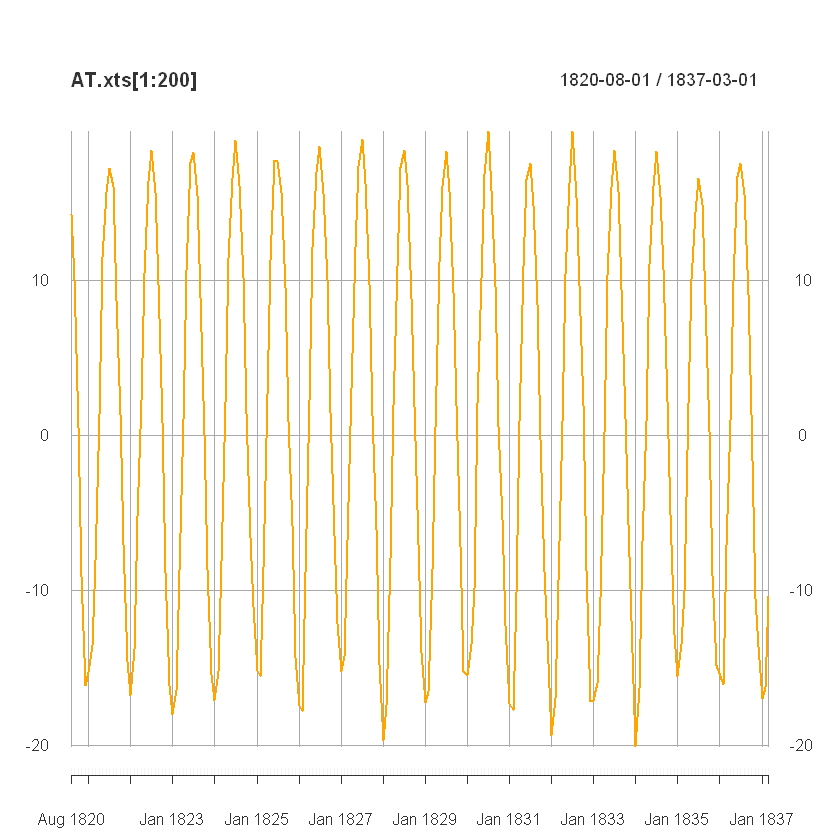

In [15]:
plot(AT.xts[1:200], type="l",col="orange")

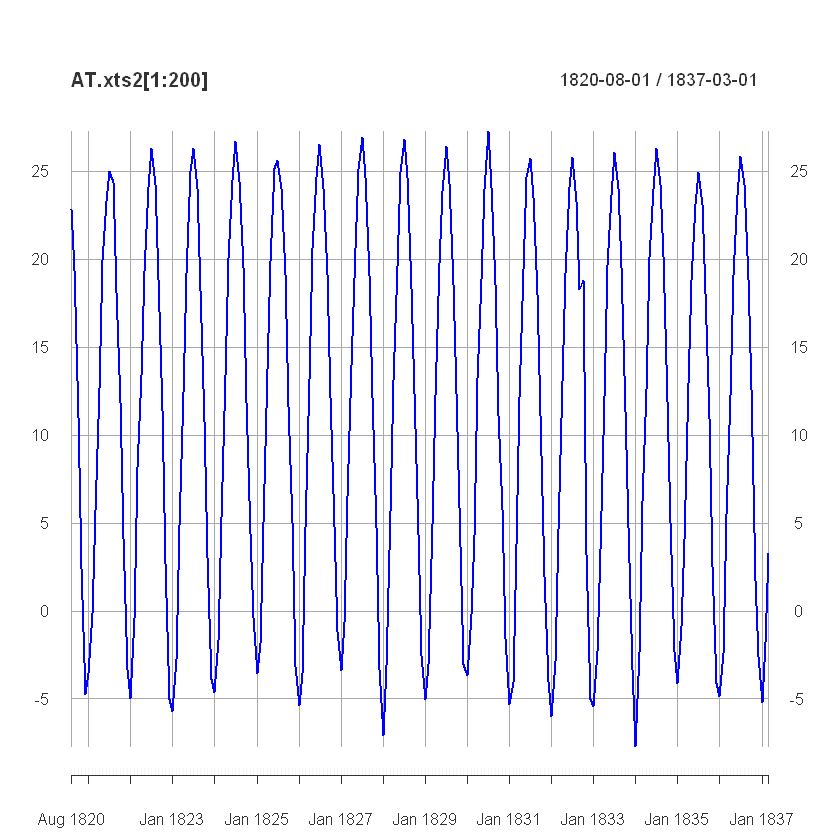

In [16]:
plot(AT.xts2[1:200], type="l",col="Blue")

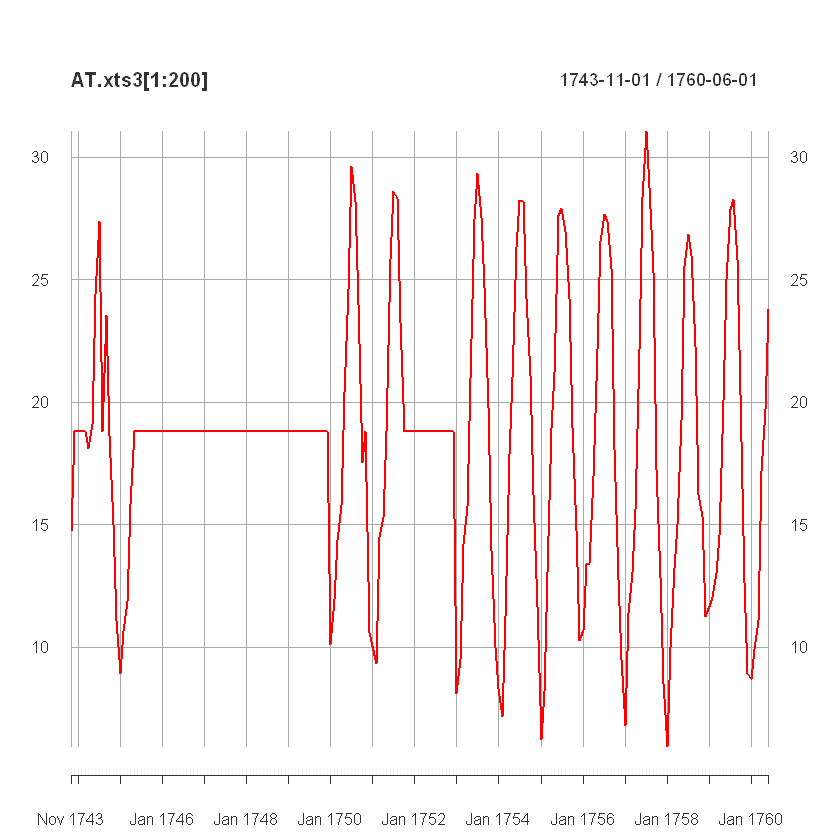

In [17]:
plot(AT.xts3[1:200], type="l",col="red")

In [18]:
length(AT.xts3)

[1] 3239

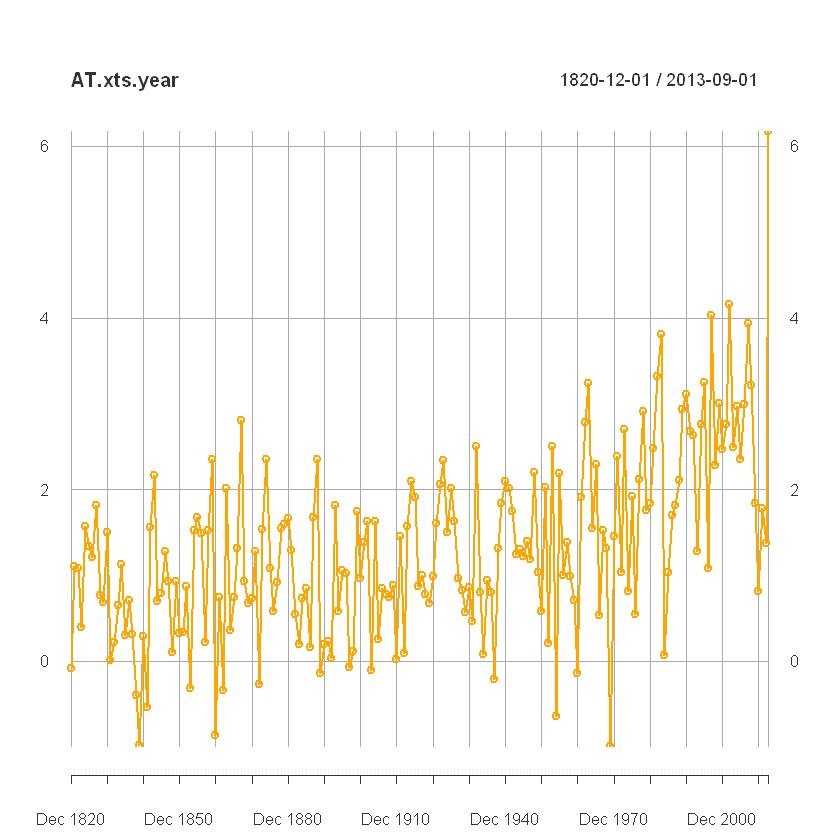

In [19]:
AT.xts.year<-apply.yearly(AT.xts,FUN="mean")

plot(AT.xts.year,type="o",col="orange")

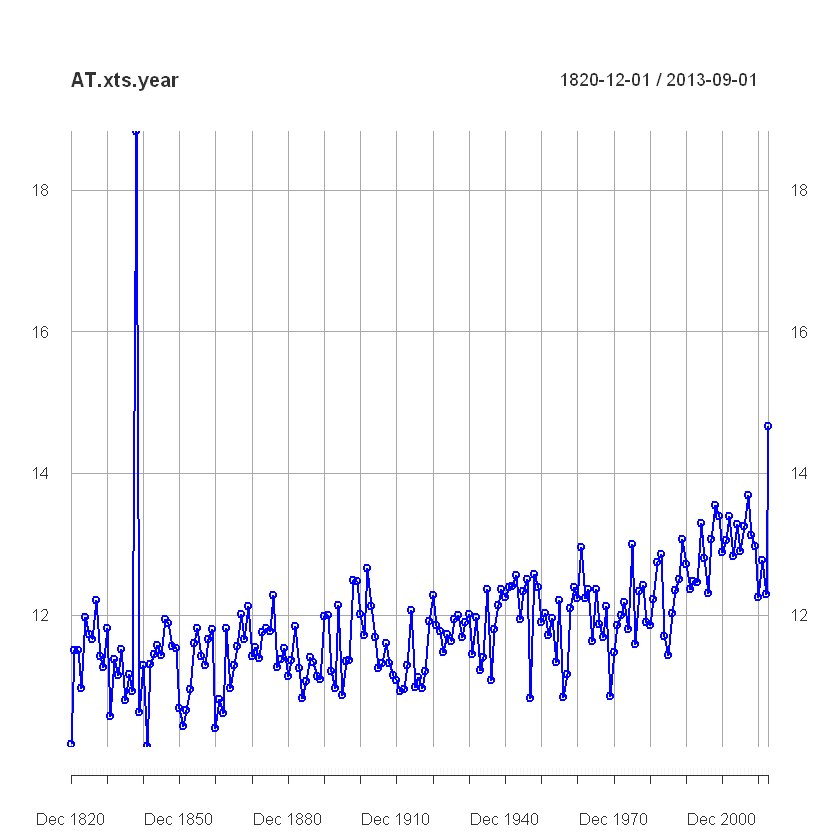

In [20]:
AT.xts.year<-apply.yearly(AT.xts2,FUN="mean")

plot(AT.xts.year,type="o",col="blue")

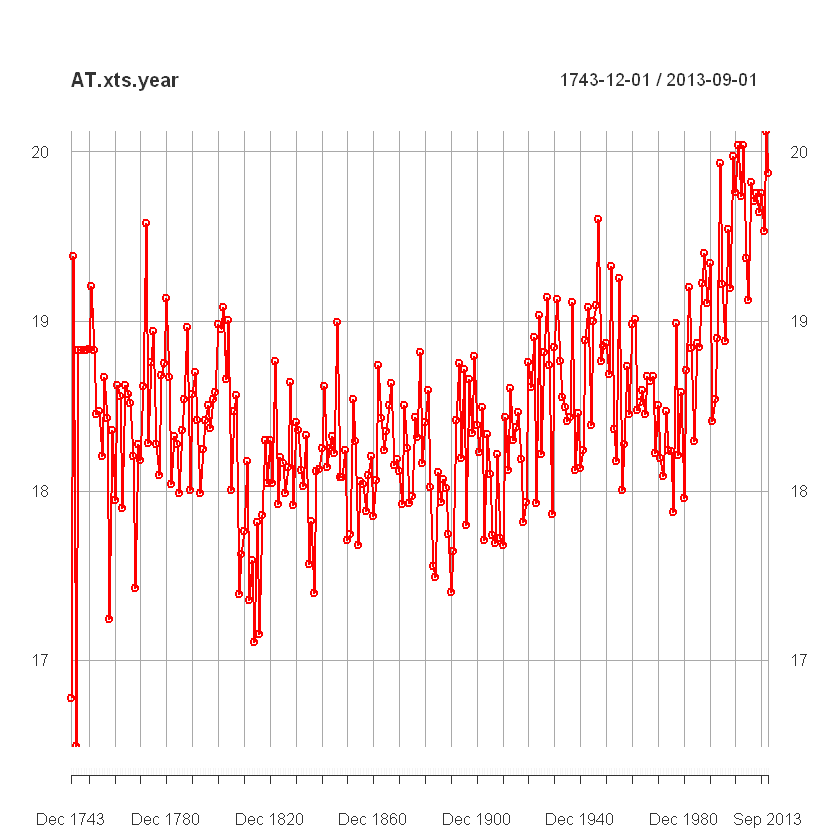

In [21]:
AT.xts.year<-apply.yearly(AT.xts3,FUN="mean")

plot(AT.xts.year,type="o",col="red")

## we notice from the figure we notice that time series is stationary

## **ACF** (Auto-Correlation Function)

*The ACF is a statistical tool used to measure the correlation between a time series and a lagged version of itself. It can help identify patterns and relationships in the data.*

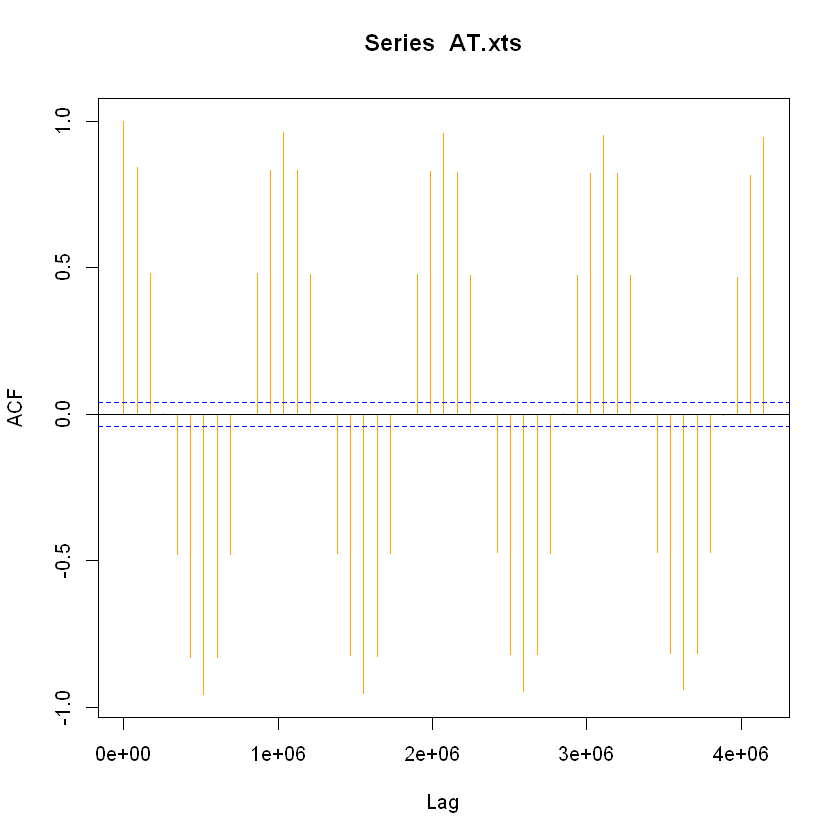

In [22]:
acf(AT.xts, lag=48,col="orange")


3ana seosonality freq =12

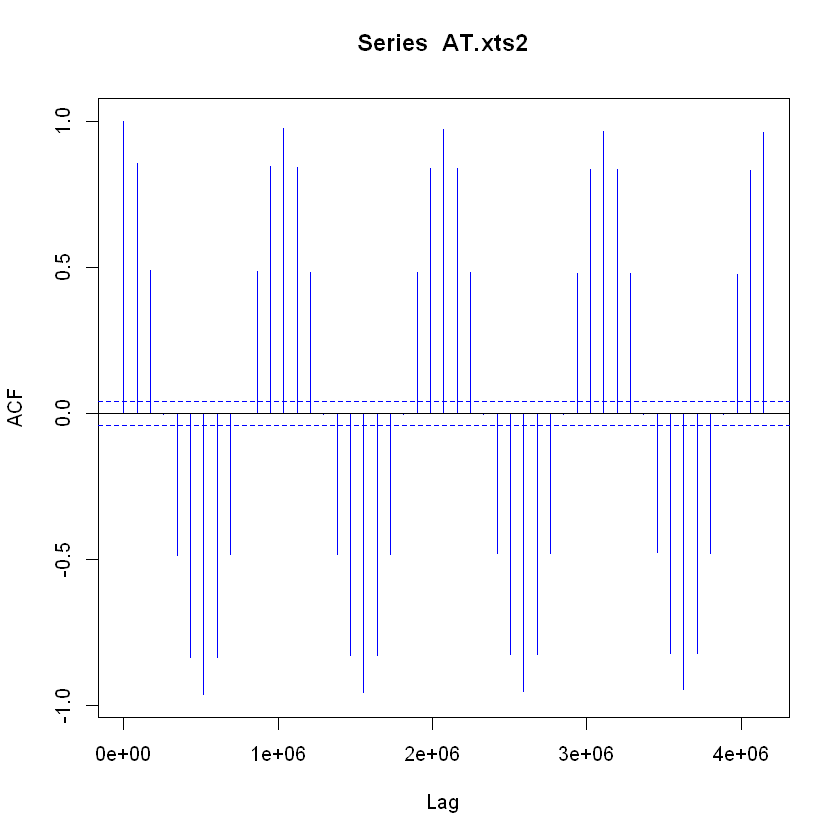

In [23]:
acf(AT.xts2, lag=48,col="blue")

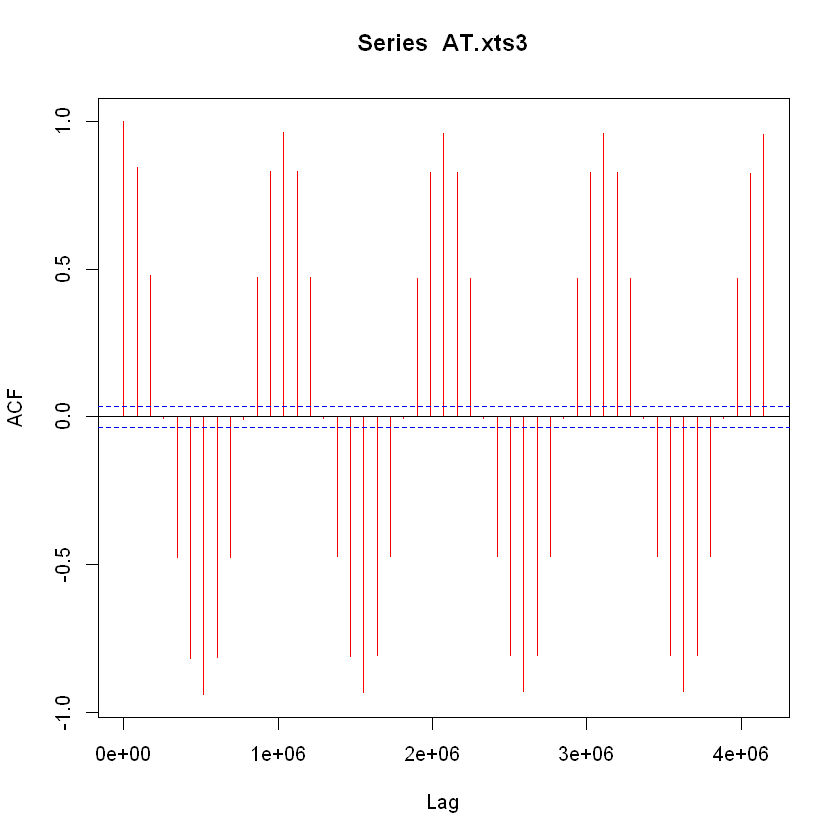

In [24]:
acf(AT.xts3, lag=48 , col="red")

## from these figures we noticed that the frequency of these time series equals to 12

## MODEL1 City Ã–skemen

In [25]:
my_function <- function(l, T, MC, MS) {
  t <- 1:l
  MC <- matrix(1, l, T/2)
  MS <- matrix(1, l, T/2)
  for (i in 1:(T/2)) {
    MC[, i] <- cos(2 * pi * i * t / T)
    MS[, i] <- sin(2 * pi * i * t / T)
  }
  return(list(l = l, T = T, MC = MC, MS = MS,t=t))
}

In [52]:
res=my_function(l=length(AT.xts),T=12)
MC=res$MC
MS=res$MS
l=res$l
t=res$t

In [53]:
m1=lm(AT.xts[0:l]~t)
m2=lm(AT.xts[0:l]~t+MS+MC)
m3=lm(AT.xts[0:l]~t+I(t^2)+MS+MC)
summary(m3)


Call:
lm(formula = AT.xts[0:l] ~ t + I(t^2) + MS + MC)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.3047  -1.1952   0.1007   1.3908   8.2751 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.207e-01  1.497e-01   6.151 9.06e-10 ***
t           -5.517e-04  2.981e-04  -1.851   0.0643 .  
I(t^2)       5.718e-07  1.245e-07   4.593 4.60e-06 ***
MS1          1.730e-01  7.050e-02   2.453   0.0142 *  
MS2         -4.585e-01  7.048e-02  -6.505 9.52e-11 ***
MS3          1.587e-01  7.050e-02   2.250   0.0245 *  
MS4          9.194e-02  7.048e-02   1.304   0.1922    
MS5         -2.650e-02  7.050e-02  -0.376   0.7070    
MS6          1.106e+11  1.735e+11   0.637   0.5239    
MC1          1.819e+01  7.051e-02 257.998  < 2e-16 ***
MC2         -6.746e-01  7.051e-02  -9.567  < 2e-16 ***
MC3         -4.604e-01  7.050e-02  -6.531 8.03e-11 ***
MC4          3.577e-01  7.052e-02   5.073 4.24e-07 ***
MC5          4.103e-03  7.050e-02   0.058   0.9536    


In [54]:
MS=MS[,c(-5)]
MS

5.000000e-01,8.660254e-01,1.000000e+00,8.660254e-01,1.224606e-16
8.660254e-01,8.660254e-01,1.224606e-16,-8.660254e-01,-2.449213e-16
1.000000e+00,1.224606e-16,-1.000000e+00,-2.449213e-16,3.673819e-16
8.660254e-01,-8.660254e-01,-2.449213e-16,8.660254e-01,-4.898425e-16
5.000000e-01,-8.660254e-01,1.000000e+00,-8.660254e-01,2.388660e-15
1.224606e-16,-2.449213e-16,3.673819e-16,-4.898425e-16,-7.347638e-16
-5.000000e-01,8.660254e-01,-1.000000e+00,8.660254e-01,8.572244e-16
-8.660254e-01,8.660254e-01,-4.898425e-16,-8.660254e-01,-9.796851e-16
-1.000000e+00,3.673819e-16,1.000000e+00,-7.347638e-16,1.102146e-15
-8.660254e-01,-8.660254e-01,2.388660e-15,8.660254e-01,-4.777320e-15
-5.000000e-01,-8.660254e-01,-1.000000e+00,-8.660254e-01,-2.205647e-15


In [55]:
m3=lm(AT.xts[0:l]~t+I(t^2)+MS+MC)
summary(m3)


Call:
lm(formula = AT.xts[0:l] ~ t + I(t^2) + MS + MC)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.3045  -1.1944   0.1029   1.3891   8.2750 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.207e-01  1.497e-01   6.152 9.00e-10 ***
t           -5.518e-04  2.981e-04  -1.851   0.0643 .  
I(t^2)       5.718e-07  1.245e-07   4.594 4.57e-06 ***
MS1          1.730e-01  7.049e-02   2.454   0.0142 *  
MS2         -4.585e-01  7.047e-02  -6.506 9.45e-11 ***
MS3          1.586e-01  7.049e-02   2.251   0.0245 *  
MS4          9.192e-02  7.047e-02   1.304   0.1923    
MS5          1.109e+11  1.734e+11   0.639   0.5228    
MC1          1.819e+01  7.049e-02 258.046  < 2e-16 ***
MC2         -6.746e-01  7.050e-02  -9.569  < 2e-16 ***
MC3         -4.604e-01  7.049e-02  -6.532 7.95e-11 ***
MC4          3.577e-01  7.051e-02   5.073 4.22e-07 ***
MC5          4.123e-03  7.049e-02   0.058   0.9534    
MC6         -2.953e-02  5.569e-02  -0.530   0.5960    


In [56]:
MS=MS[,c(-5)]
MS

5.000000e-01,8.660254e-01,1.000000e+00,8.660254e-01
8.660254e-01,8.660254e-01,1.224606e-16,-8.660254e-01
1.000000e+00,1.224606e-16,-1.000000e+00,-2.449213e-16
8.660254e-01,-8.660254e-01,-2.449213e-16,8.660254e-01
5.000000e-01,-8.660254e-01,1.000000e+00,-8.660254e-01
1.224606e-16,-2.449213e-16,3.673819e-16,-4.898425e-16
-5.000000e-01,8.660254e-01,-1.000000e+00,8.660254e-01
-8.660254e-01,8.660254e-01,-4.898425e-16,-8.660254e-01
-1.000000e+00,3.673819e-16,1.000000e+00,-7.347638e-16
-8.660254e-01,-8.660254e-01,2.388660e-15,8.660254e-01
-5.000000e-01,-8.660254e-01,-1.000000e+00,-8.660254e-01


In [57]:
m3=lm(AT.xts[0:l]~t+I(t^2)+MS+MC)
summary(m3)


Call:
lm(formula = AT.xts[0:l] ~ t + I(t^2) + MS + MC)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.377  -1.212   0.103   1.379   8.284 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.202e-01  1.496e-01   6.150 9.13e-10 ***
t           -5.505e-04  2.980e-04  -1.847   0.0648 .  
I(t^2)       5.712e-07  1.244e-07   4.591 4.66e-06 ***
MS1          1.731e-01  7.048e-02   2.456   0.0141 *  
MS2         -4.585e-01  7.046e-02  -6.507 9.34e-11 ***
MS3          1.585e-01  7.048e-02   2.249   0.0246 *  
MS4          9.205e-02  7.046e-02   1.306   0.1915    
MC1          1.819e+01  7.048e-02 258.114  < 2e-16 ***
MC2         -6.745e-01  7.049e-02  -9.568  < 2e-16 ***
MC3         -4.605e-01  7.048e-02  -6.535 7.82e-11 ***
MC4          3.583e-01  7.049e-02   5.083 4.02e-07 ***
MC5          3.986e-03  7.048e-02   0.057   0.9549    
MC6         -4.542e-02  4.983e-02  -0.911   0.3622    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 

In [58]:
MS=MS[,c(-4)]
MS

5.000000e-01,8.660254e-01,1.000000e+00
8.660254e-01,8.660254e-01,1.224606e-16
1.000000e+00,1.224606e-16,-1.000000e+00
8.660254e-01,-8.660254e-01,-2.449213e-16
5.000000e-01,-8.660254e-01,1.000000e+00
1.224606e-16,-2.449213e-16,3.673819e-16
-5.000000e-01,8.660254e-01,-1.000000e+00
-8.660254e-01,8.660254e-01,-4.898425e-16
-1.000000e+00,3.673819e-16,1.000000e+00
-8.660254e-01,-8.660254e-01,2.388660e-15
-5.000000e-01,-8.660254e-01,-1.000000e+00


In [59]:
m3=lm(AT.xts[0:l]~t+I(t^2)+MS+MC)
summary(m3)


Call:
lm(formula = AT.xts[0:l] ~ t + I(t^2) + MS + MC)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.3769  -1.2107   0.0979   1.3811   8.2844 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.203e-01  1.497e-01   6.149 9.15e-10 ***
t           -5.506e-04  2.981e-04  -1.847   0.0648 .  
I(t^2)       5.712e-07  1.245e-07   4.590 4.67e-06 ***
MS1          1.731e-01  7.049e-02   2.456   0.0141 *  
MS2         -4.585e-01  7.047e-02  -6.506 9.40e-11 ***
MS3          1.586e-01  7.049e-02   2.250   0.0245 *  
MC1          1.819e+01  7.049e-02 258.075  < 2e-16 ***
MC2         -6.744e-01  7.050e-02  -9.566  < 2e-16 ***
MC3         -4.605e-01  7.049e-02  -6.533 7.92e-11 ***
MC4          3.583e-01  7.050e-02   5.082 4.04e-07 ***
MC5          3.892e-03  7.049e-02   0.055   0.9560    
MC6         -4.549e-02  4.984e-02  -0.913   0.3616    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.4 on 2306 degre

In [60]:
MC=MC[,c(-5)]
MC

8.660254e-01,0.5,6.123032e-17,-0.5,-1
5.000000e-01,-0.5,-1.000000e+00,-0.5,1
6.123032e-17,-1.0,-1.836910e-16,1.0,-1
-5.000000e-01,-0.5,1.000000e+00,-0.5,1
-8.660254e-01,0.5,1.194330e-15,-0.5,-1
-1.000000e+00,1.0,-1.000000e+00,1.0,1
-8.660254e-01,0.5,-4.286122e-16,-0.5,-1
-5.000000e-01,-0.5,1.000000e+00,-0.5,1
-1.836910e-16,-1.0,5.510729e-16,1.0,-1
5.000000e-01,-0.5,-1.000000e+00,-0.5,1
8.660254e-01,0.5,1.102823e-15,-0.5,-1


In [61]:
m3=lm(AT.xts[0:l]~t+I(t^2)+MS+MC)
summary(m3)


Call:
lm(formula = AT.xts[0:l] ~ t + I(t^2) + MS + MC)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.3808  -1.2088   0.0976   1.3807   8.2805 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.203e-01  1.496e-01   6.150 9.08e-10 ***
t           -5.506e-04  2.980e-04  -1.848   0.0648 .  
I(t^2)       5.712e-07  1.244e-07   4.591 4.65e-06 ***
MS1          1.731e-01  7.047e-02   2.456   0.0141 *  
MS2         -4.585e-01  7.046e-02  -6.508 9.32e-11 ***
MS3          1.586e-01  7.047e-02   2.250   0.0245 *  
MC1          1.819e+01  7.047e-02 258.131  < 2e-16 ***
MC2         -6.744e-01  7.049e-02  -9.568  < 2e-16 ***
MC3         -4.605e-01  7.047e-02  -6.534 7.85e-11 ***
MC4          3.583e-01  7.049e-02   5.083 4.02e-07 ***
MC5         -4.548e-02  4.983e-02  -0.913   0.3615    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.399 on 2307 degrees of freedom
Multiple R-squared:  0.9667,	Adjusted R

In [62]:
MC=MC[,c(-5)]
MC

8.660254e-01,0.5,6.123032e-17,-0.5
5.000000e-01,-0.5,-1.000000e+00,-0.5
6.123032e-17,-1.0,-1.836910e-16,1.0
-5.000000e-01,-0.5,1.000000e+00,-0.5
-8.660254e-01,0.5,1.194330e-15,-0.5
-1.000000e+00,1.0,-1.000000e+00,1.0
-8.660254e-01,0.5,-4.286122e-16,-0.5
-5.000000e-01,-0.5,1.000000e+00,-0.5
-1.836910e-16,-1.0,5.510729e-16,1.0
5.000000e-01,-0.5,-1.000000e+00,-0.5
8.660254e-01,0.5,1.102823e-15,-0.5


In [63]:
m3=lm(AT.xts[0:l]~t+I(t^2)+MS+MC)
summary(m3)


Call:
lm(formula = AT.xts[0:l] ~ t + I(t^2) + MS + MC)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.4262  -1.2370   0.0899   1.3782   8.2351 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.203e-01  1.496e-01   6.151 9.04e-10 ***
t           -5.506e-04  2.980e-04  -1.848   0.0648 .  
I(t^2)       5.712e-07  1.244e-07   4.591 4.65e-06 ***
MS1          1.731e-01  7.047e-02   2.456   0.0141 *  
MS2         -4.585e-01  7.046e-02  -6.508 9.30e-11 ***
MS3          1.586e-01  7.047e-02   2.251   0.0245 *  
MC1          1.819e+01  7.047e-02 258.140  < 2e-16 ***
MC2         -6.744e-01  7.049e-02  -9.568  < 2e-16 ***
MC3         -4.604e-01  7.047e-02  -6.534 7.86e-11 ***
MC4          3.583e-01  7.049e-02   5.083 4.01e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.399 on 2308 degrees of freedom
Multiple R-squared:  0.9667,	Adjusted R-squared:  0.9666 
F-statistic:  7444 on 9 and 2308 DF,

In [68]:
AIC(m1,m2,m3)
BIC(m1,m2,m3)

,df,AIC
m1,3,18513.09
m2,15,10673.11
m3,11,10647.08


,df,BIC
m1,3,18530.33
m2,15,10759.34
m3,11,10710.31


## Conclusion: model 3 is the best 

## MODEL2 City Zhuozhou


In [65]:
res2=my_function(l=length(AT.xts2),T=12)
MC2=res2$MC
MS2=res2$MS
l2=res2$l
t2=res2$t

In [66]:
m21=lm(AT.xts2[1:l2]~t2)
m22=lm(AT.xts2[1:l2]~t2+MS2+MC2)
m23=lm(AT.xts2[1:l2]~t2+I(t2^2)+MS2+MC2)
summary(m23)


Call:
lm(formula = AT.xts2[1:l2] ~ t2 + I(t2^2) + MS2 + MC2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1684 -0.7737 -0.0070  0.7365 23.9582 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.161e+01  9.557e-02 121.478  < 2e-16 ***
t2          -5.943e-04  1.903e-04  -3.122  0.00182 ** 
I(t2^2)      5.148e-07  7.947e-08   6.478 1.13e-10 ***
MS21        -2.908e-01  4.501e-02  -6.462 1.26e-10 ***
MS22         4.167e-01  4.500e-02   9.260  < 2e-16 ***
MS23        -1.756e-02  4.501e-02  -0.390  0.69642    
MS24         1.129e-01  4.500e-02   2.509  0.01216 *  
MS25        -1.008e-02  4.501e-02  -0.224  0.82280    
MS26        -6.940e+10  1.108e+11  -0.627  0.53094    
MC21         1.552e+01  4.501e-02 344.742  < 2e-16 ***
MC22        -1.136e+00  4.502e-02 -25.230  < 2e-16 ***
MC23         7.155e-02  4.501e-02   1.590  0.11207    
MC24         1.193e-01  4.502e-02   2.650  0.00810 ** 
MC25        -2.787e-02  4.501e-02  -0.619  0.53578    
MC26

In [67]:
AIC(m21,m22,m23)
BIC(m21,m22,m23)

,df,AIC
m21,3,17749.765
m22,15,8613.575
m23,16,8573.721


,df,BIC
m21,3,17767.011
m22,15,8699.802
m23,16,8665.697


## model 23 is the best

## MODEL1 City Aryana


In [32]:
res3=my_function(l=length(AT.xts3),T=12)
MC3=res3$MC
MS3=res3$MS
l3=res3$l
t3=res3$t

In [33]:
m31=lm(AT.xts3[1:l3]~t3)
m32=lm(AT.xts3[1:l3]~t3+MS3+MC3)
m33=lm(AT.xts3[1:l3]~t3+I(t3^2)+MS3+MC3)
summary(m33)


Call:
lm(formula = AT.xts3[1:l3] ~ t3 + I(t3^2) + MS3 + MC3)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2030 -0.7163  0.0036  0.7231  8.5846 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  1.871e+01  7.682e-02  243.521  < 2e-16 ***
t3          -9.249e-04  1.095e-04   -8.445  < 2e-16 ***
I(t3^2)      3.573e-07  3.273e-08   10.919  < 2e-16 ***
MS31        -8.600e+00  3.619e-02 -237.641  < 2e-16 ***
MS32        -7.341e-01  3.619e-02  -20.287  < 2e-16 ***
MS33         2.742e-01  3.619e-02    7.577 4.58e-14 ***
MS34         5.152e-02  3.619e-02    1.424   0.1546    
MS35         1.418e-02  3.619e-02    0.392   0.6951    
MS36        -3.998e+10  6.477e+10   -0.617   0.5371    
MC31         1.748e+00  3.620e-02   48.272  < 2e-16 ***
MC32        -5.120e-01  3.620e-02  -14.146  < 2e-16 ***
MC33         1.433e-01  3.620e-02    3.958 7.72e-05 ***
MC34        -6.589e-02  3.620e-02   -1.820   0.0688 .  
MC35         6.279e-04  3.620e-02    0.017   

In [34]:
AIC(m31,m32,m33)
BIC(m31,m32,m33)

,df,AIC
m31,3,21238.33
m32,15,11760.09
m33,16,11644.48


,df,BIC
m31,3,21256.57
m32,15,11851.34
m33,16,11741.81


## model 33 is the best 

# Plot the models

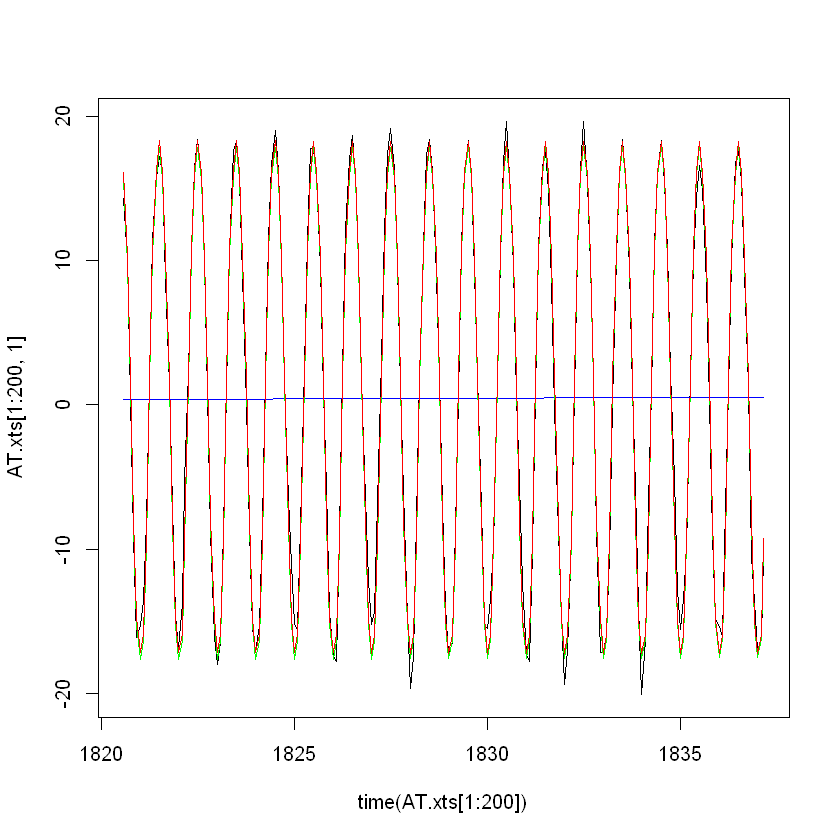

In [35]:
plot(time(AT.xts[1:200]),AT.xts[1:200,1], lwd=1, type="l")
points(time(AT.xts[1:200]), fitted(m1)[1:200], col="blue", lwd=1, type="l")
points(time(AT.xts[1:200]), fitted(m2)[1:200], col="green", lwd=1, type="l")
points(time(AT.xts[1:200]), fitted(m3)[1:200], col="red", lwd=1, type="l")


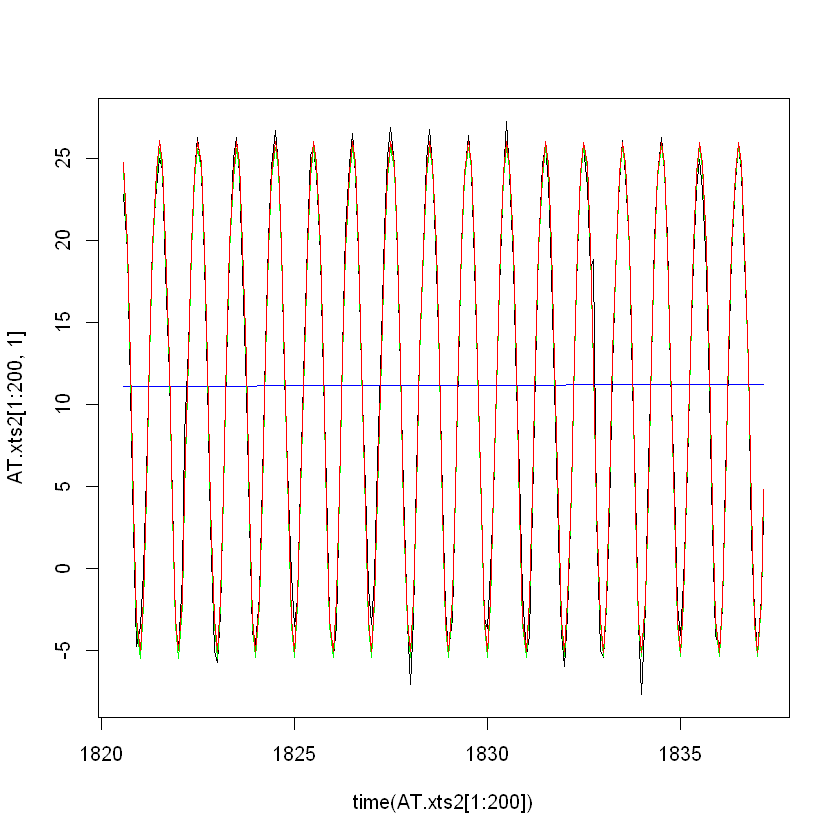

In [36]:
plot(time(AT.xts2[1:200]),AT.xts2[1:200,1], lwd=1, type="l")
points(time(AT.xts2[1:200]), fitted(m21)[1:200], col="blue", lwd=1, type="l")
points(time(AT.xts2[1:200]), fitted(m22)[1:200], col="green", lwd=1, type="l")
points(time(AT.xts2[1:200]), fitted(m23)[1:200], col="red", lwd=1, type="l")


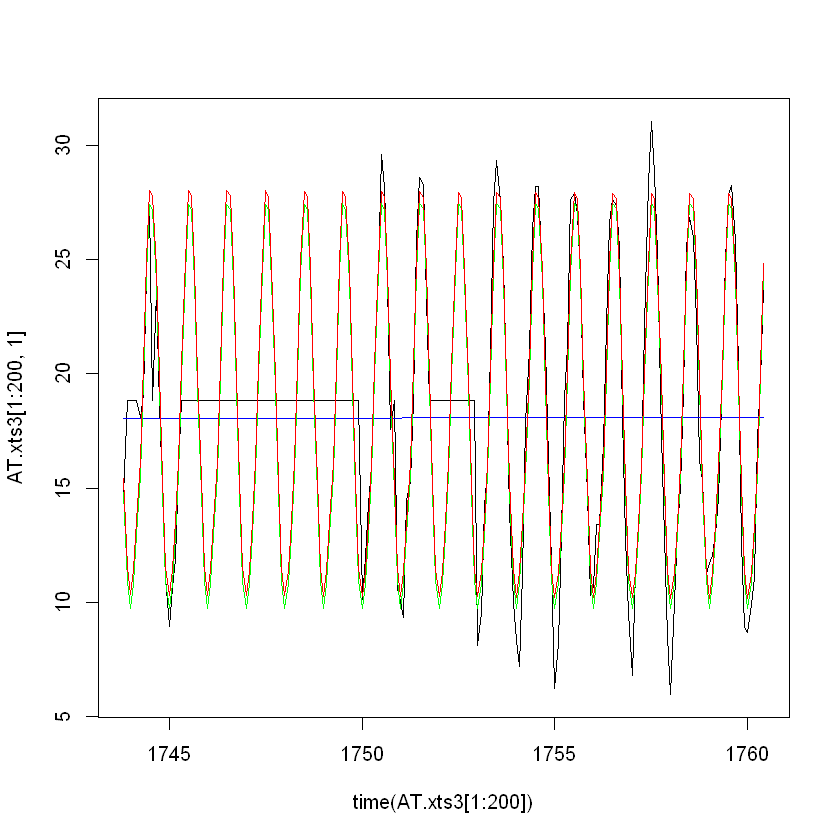

In [37]:
plot(time(AT.xts3[1:200]),AT.xts3[1:200,1], lwd=1, type="l")
points(time(AT.xts3[1:200]), fitted(m31)[1:200], col="blue", lwd=1, type="l")
points(time(AT.xts3[1:200]), fitted(m32)[1:200], col="green", lwd=1, type="l")
points(time(AT.xts3[1:200]), fitted(m33)[1:200], col="red", lwd=1, type="l")


## Acf of the residuals 

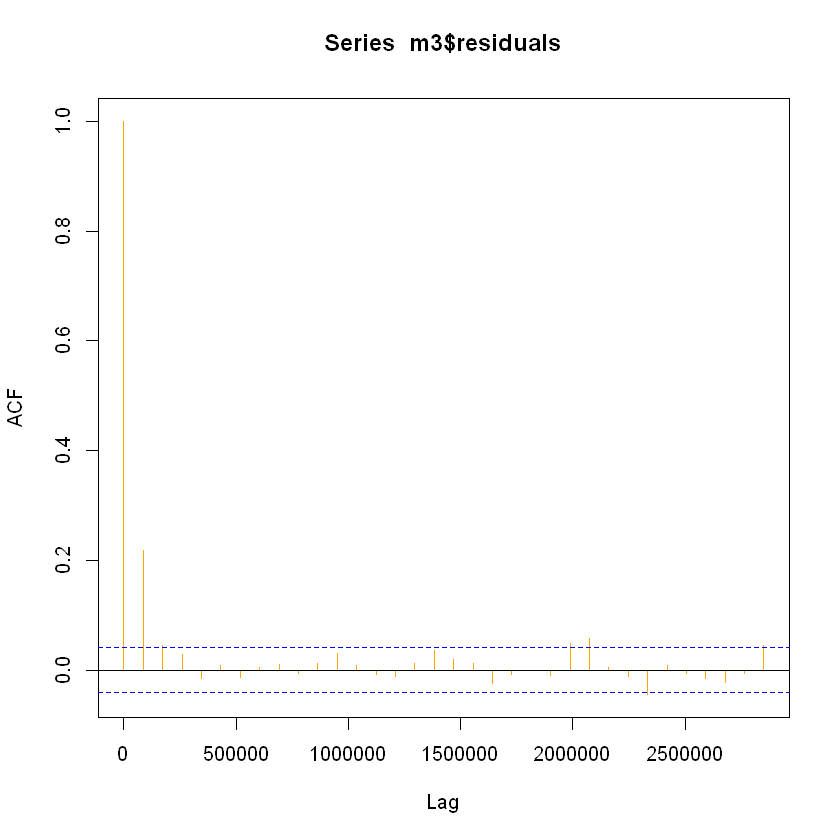

In [38]:
acf(m3$residuals, col="orange")

### We notice that the residual is not white noice because it is correlated  #

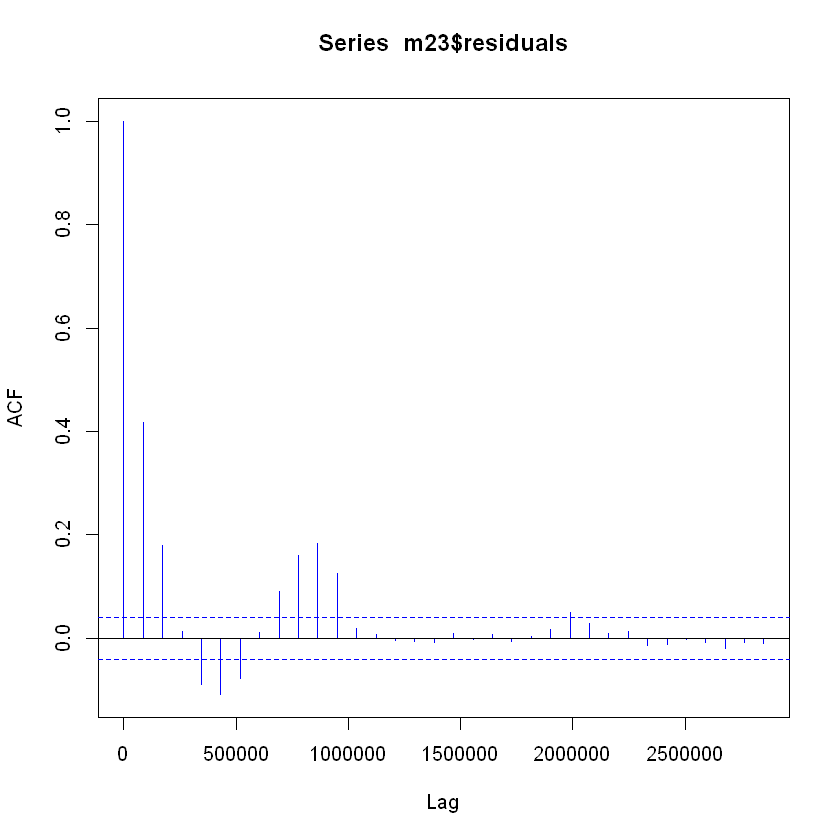

In [39]:
acf(m23$residuals,col="blue")

### We notice that the residual is not white noice because it is correlated  #

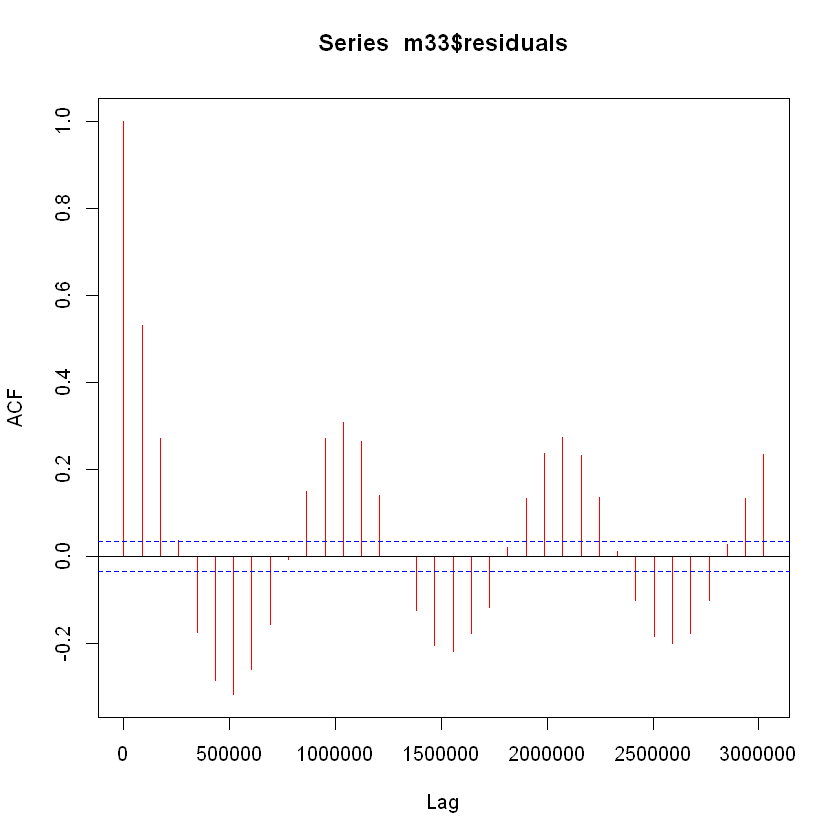

In [40]:
acf(m33$residuals,col="red")

### We notice that the residual is not white noice because it is correlated  #

# test the stationarity of the residuals 

#### H0 : Non stationary
#### H1 :  stationary

In [70]:
library(tseries)
adf.test(as.numeric(m3$residuals))

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message in adf.test(as.numeric(m3$residuals)):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  as.numeric(m3$residuals)
Dickey-Fuller = -12.445, Lag order = 13, p-value = 0.01
alternative hypothesis: stationary


In [71]:
adf.test(as.numeric(m23$residuals))

Warning message in adf.test(as.numeric(m23$residuals)):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  as.numeric(m23$residuals)
Dickey-Fuller = -10.127, Lag order = 13, p-value = 0.01
alternative hypothesis: stationary


In [72]:
adf.test(as.numeric(m33$residuals))

Warning message in adf.test(as.numeric(m33$residuals)):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  as.numeric(m33$residuals)
Dickey-Fuller = -12.977, Lag order = 14, p-value = 0.01
alternative hypothesis: stationary


## p-value<0.05 H1 accespted for all 3 models => residuals are stationary 

### plot the residuals 

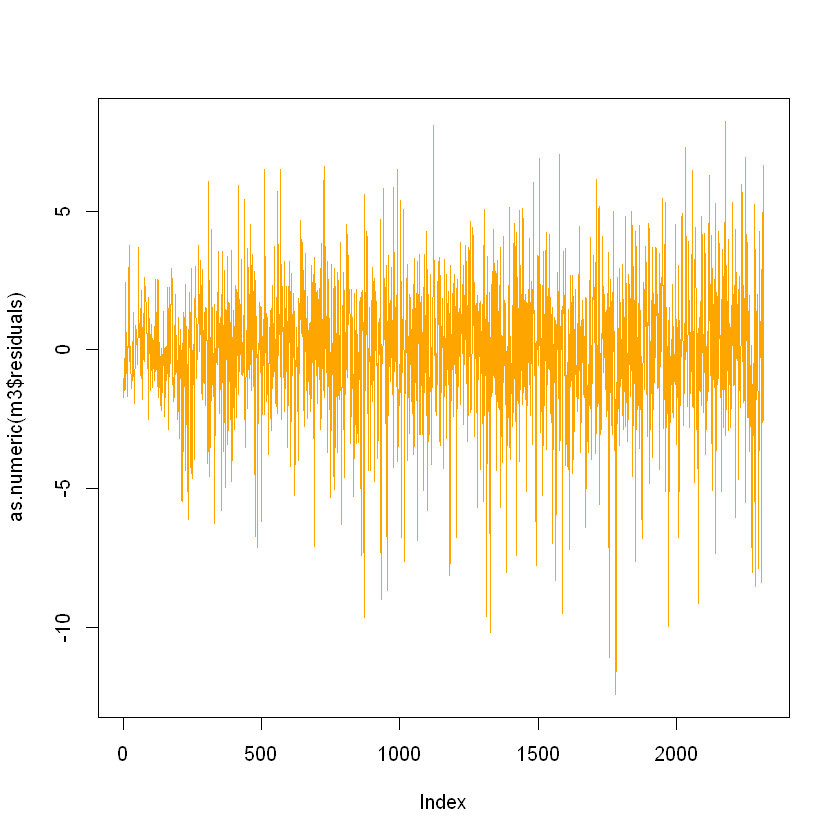

In [73]:
plot(as.numeric(m3$residuals), type="l", col="orange")

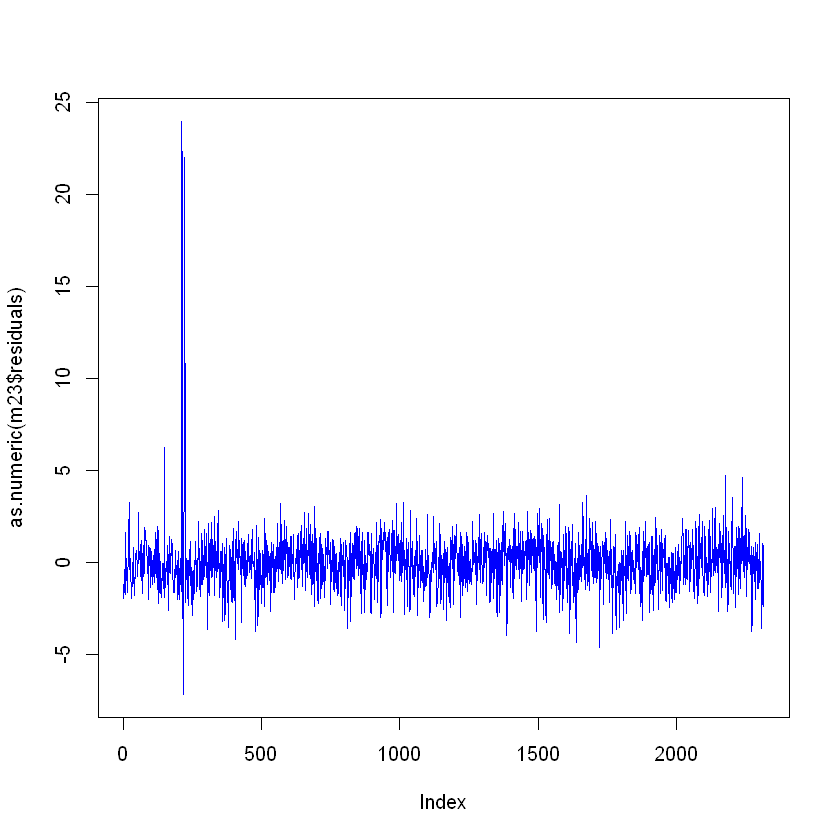

In [74]:
plot(as.numeric(m23$residuals), type="l", col="blue")

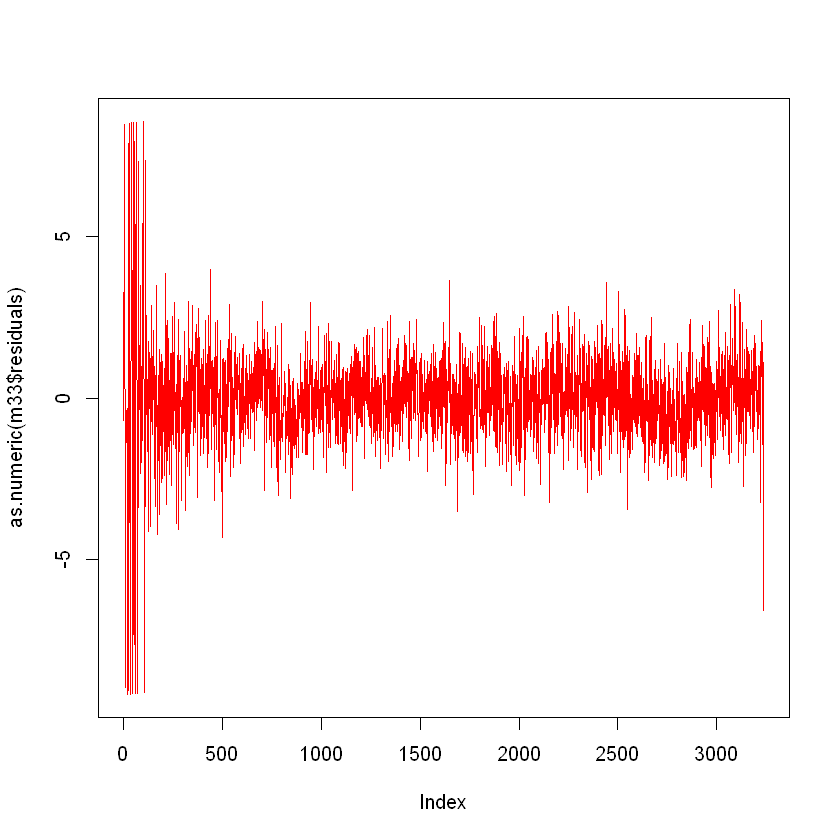

In [75]:
plot(as.numeric(m33$residuals), type="l", col="red")

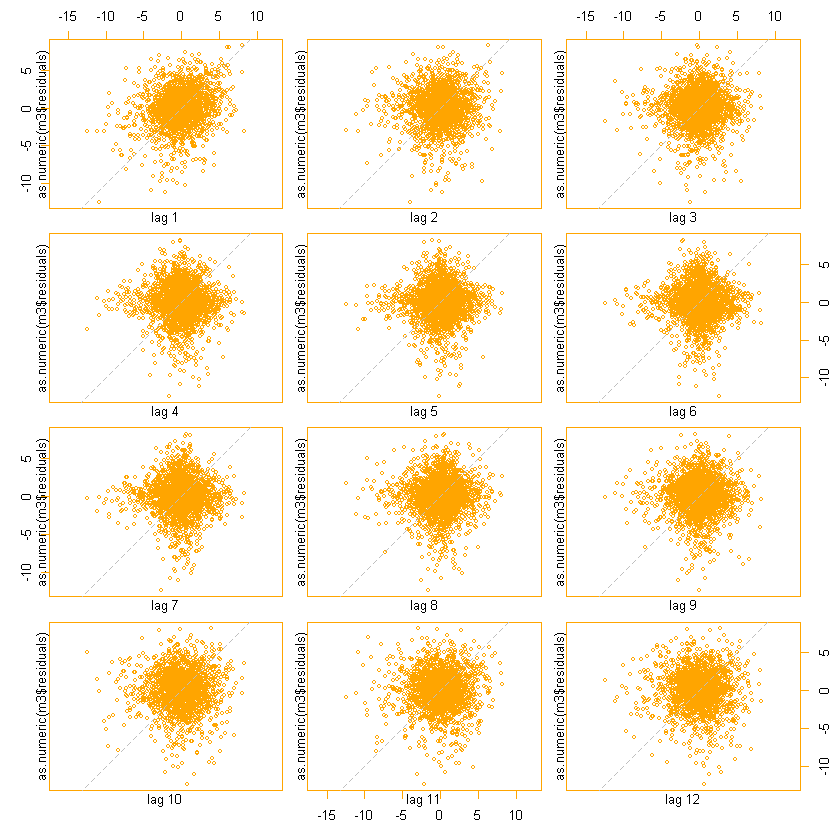

In [76]:
lag.plot(as.numeric(m3$residuals), lag=12, col="orange")

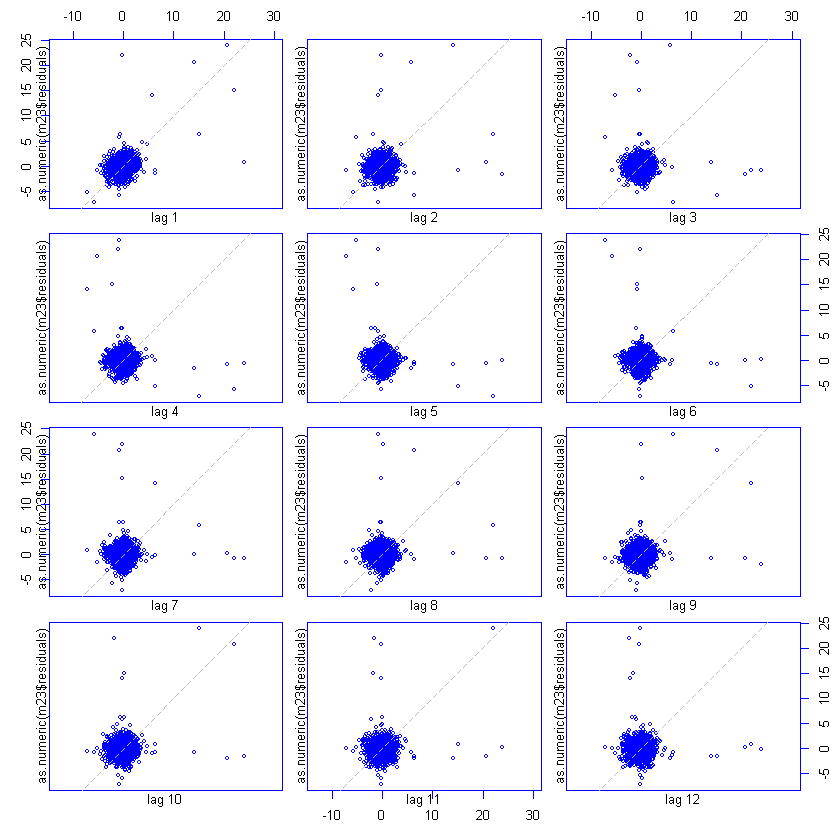

In [77]:
lag.plot(as.numeric(m23$residuals), lag=12, col="blue")

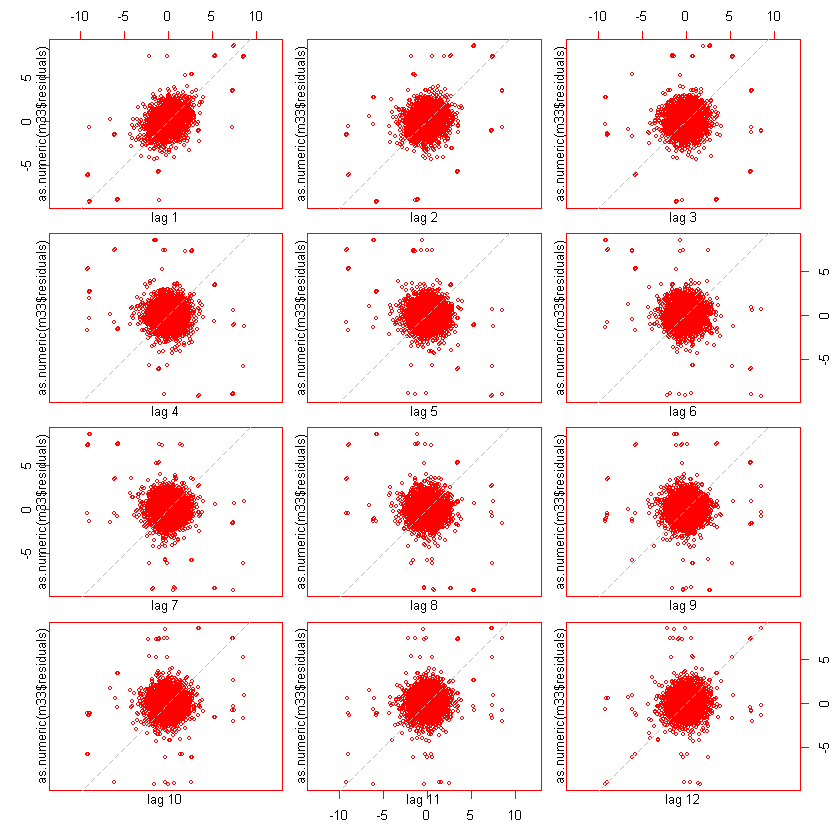

In [78]:
lag.plot(as.numeric(m33$residuals), lag=12, col="red")

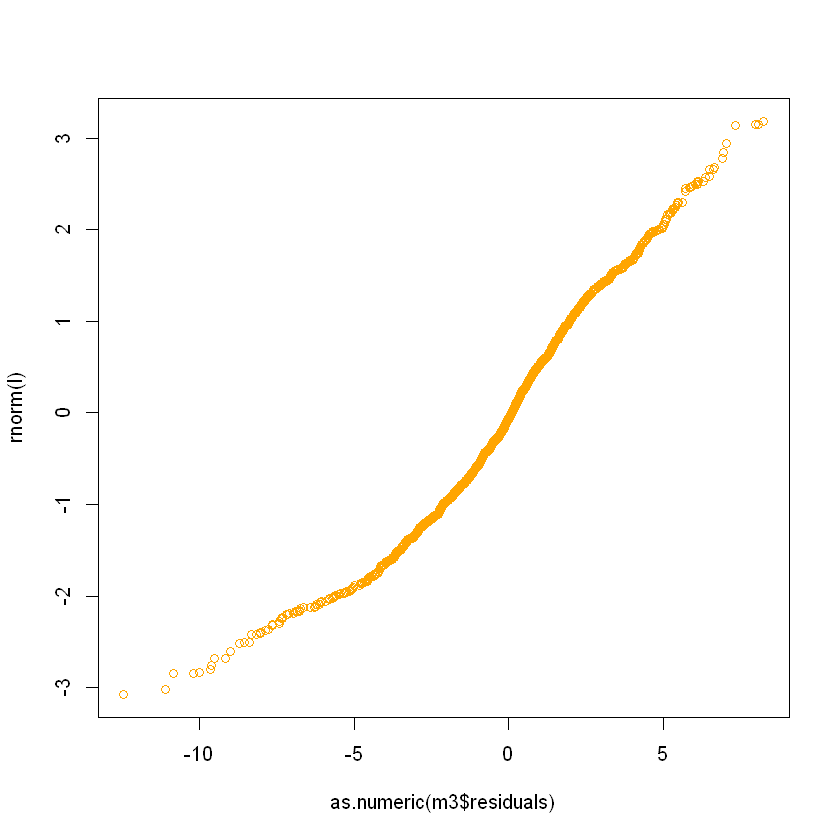

In [79]:
qqplot(as.numeric(m3$residuals), rnorm(l), col="orange")

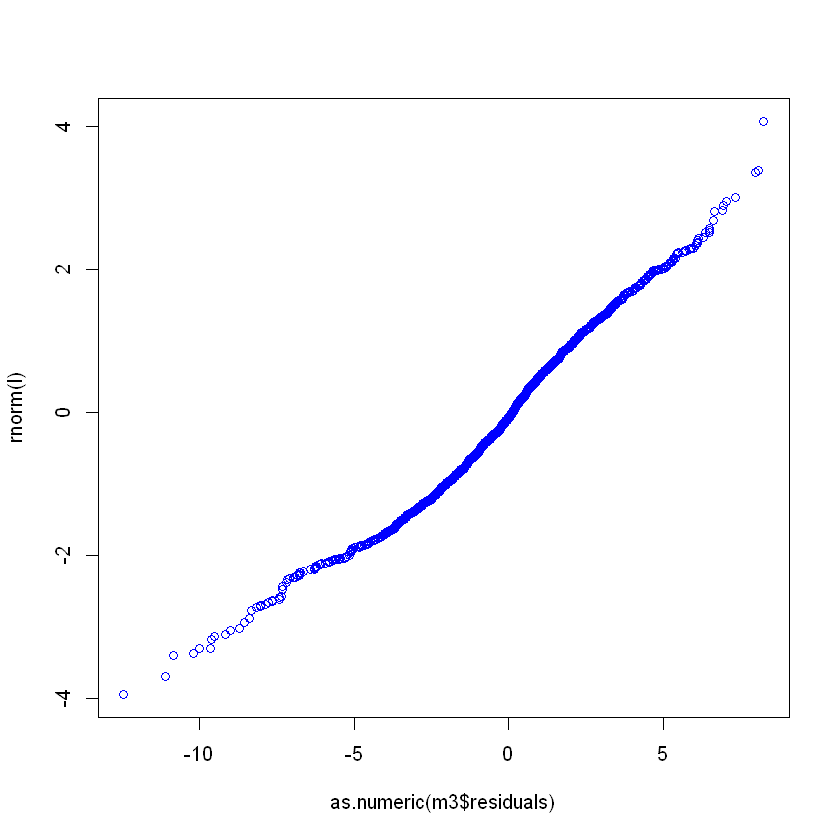

In [80]:
qqplot(as.numeric(m3$residuals), rnorm(l), col="blue")

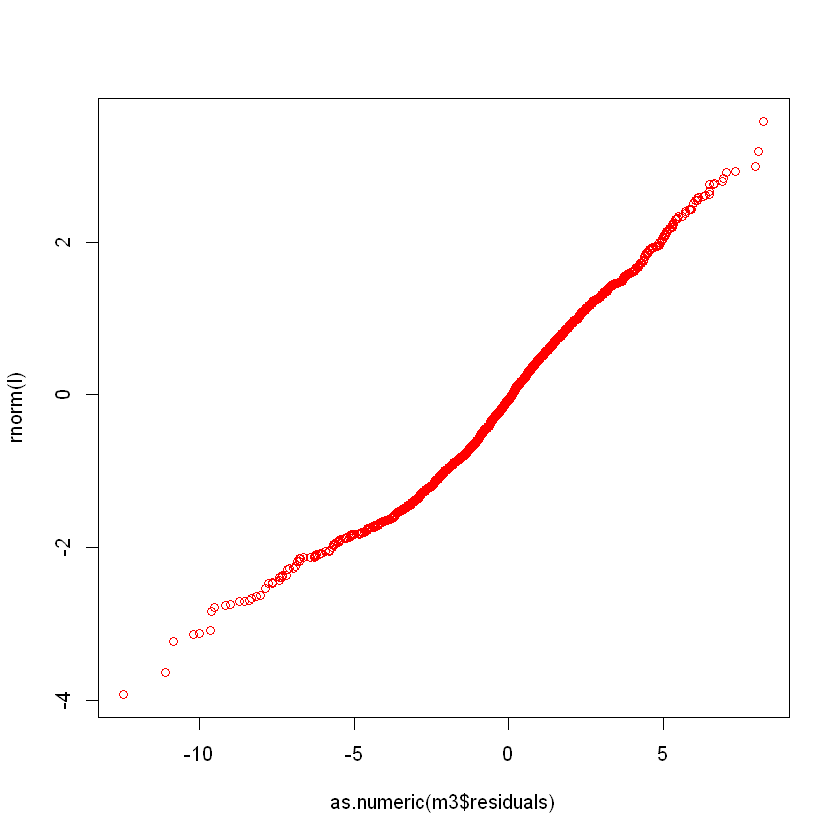

In [81]:
qqplot(as.numeric(m3$residuals), rnorm(l), col="red")

### PACF (Partial Autocorrelation Function ) Plot of the residuals 

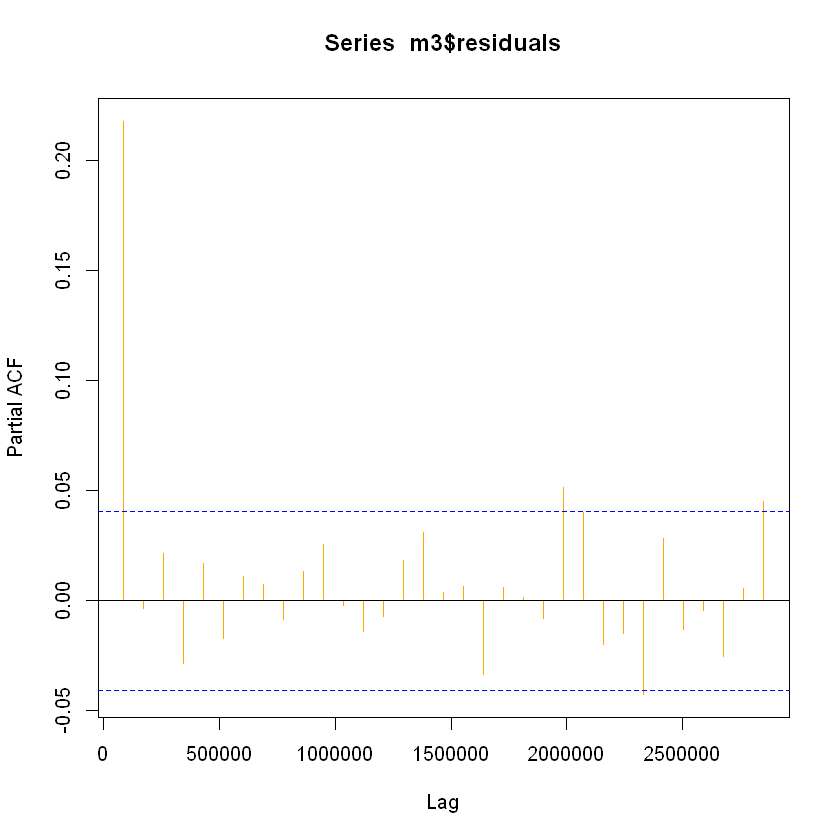

In [82]:
pacf(m3$residuals, col="orange")

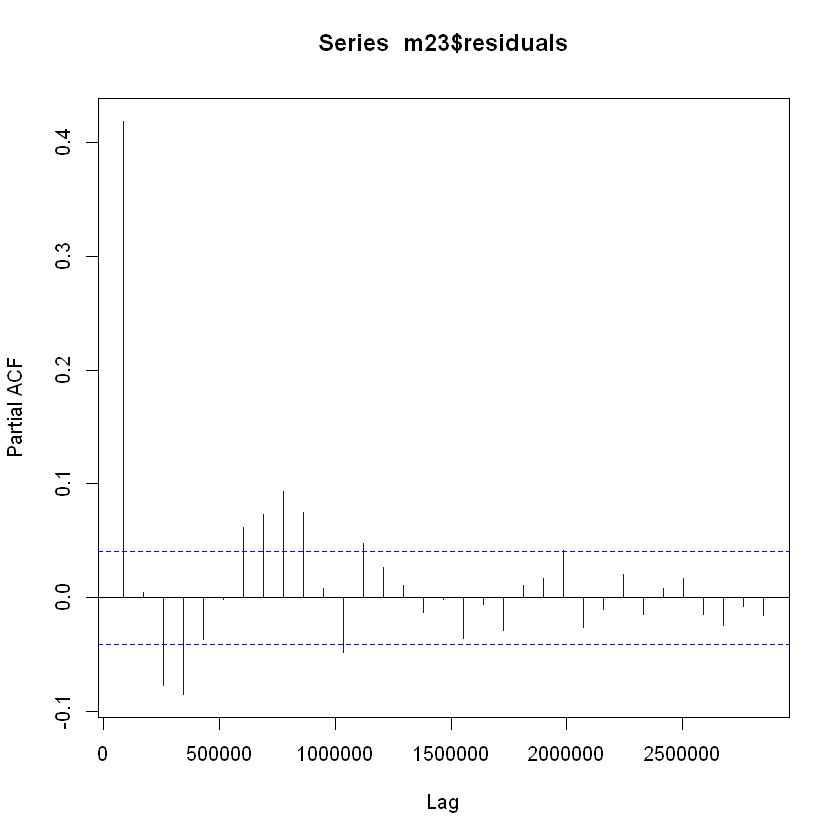

In [83]:
pacf(m23$residuals, col="blue")

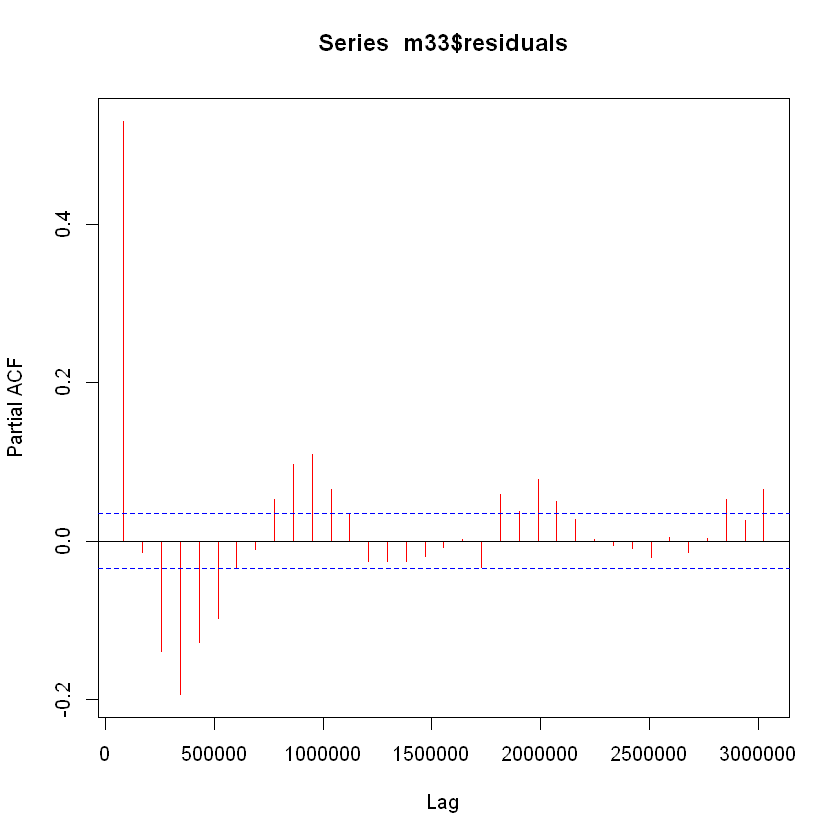

In [84]:
pacf(m33$residuals, col="red")

## ARIMA of model 3

In [87]:
library("forecast")
a=auto.arima(m3$residuals)
a

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


Series: m3$residuals 
ARIMA(1,0,0) with zero mean 

Coefficients:
         ar1
      0.2182
s.e.  0.0203

sigma^2 estimated as 5.461:  log likelihood=-5256.16
AIC=10516.32   AICc=10516.32   BIC=10527.82

## AR(1)

In [89]:
library(aTSA)
arima=arima(as.numeric(m3$residuals), order=c(1,0,0))
summary(arima)


Attaching package: 'aTSA'

The following object is masked from 'package:forecast':

    forecast

The following objects are masked from 'package:tseries':

    adf.test, kpss.test, pp.test

The following object is masked from 'package:graphics':

    identify




Call:
arima(x = as.numeric(m3$residuals), order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.2182     0.0002
s.e.  0.0203     0.0621

sigma^2 estimated as 5.459:  log likelihood = -5256.16,  aic = 10518.32

Training set error measures:
                      ME     RMSE     MAE      MPE     MAPE     MASE
Training set 0.000500643 2.336355 1.71781 104.6878 163.5507 0.773041
                     ACF1
Training set 0.0008240147


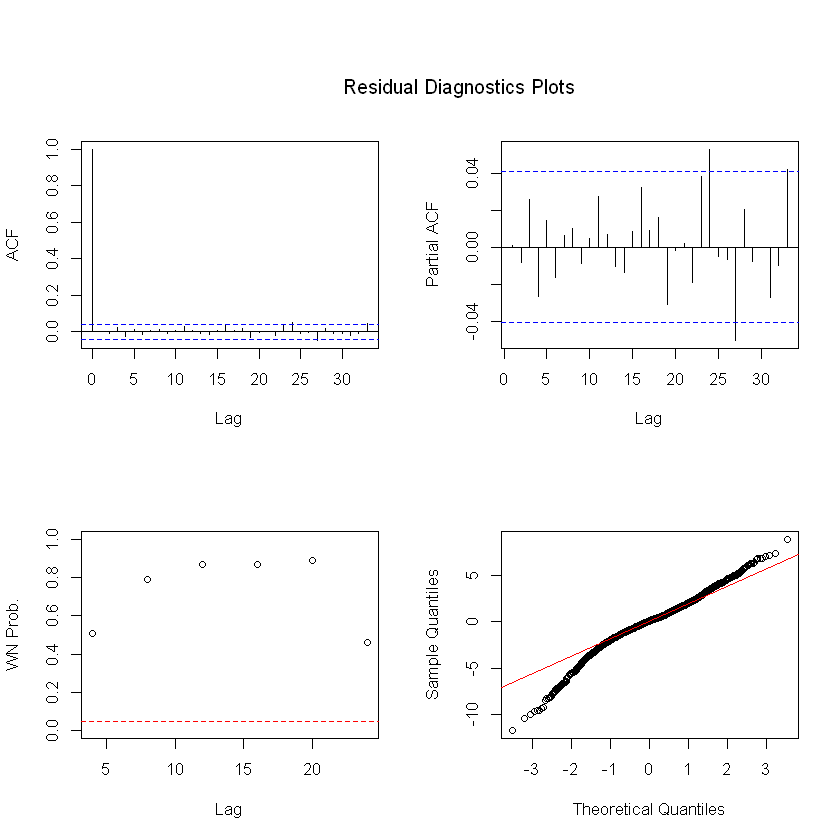

In [90]:
ts.diag(arima)

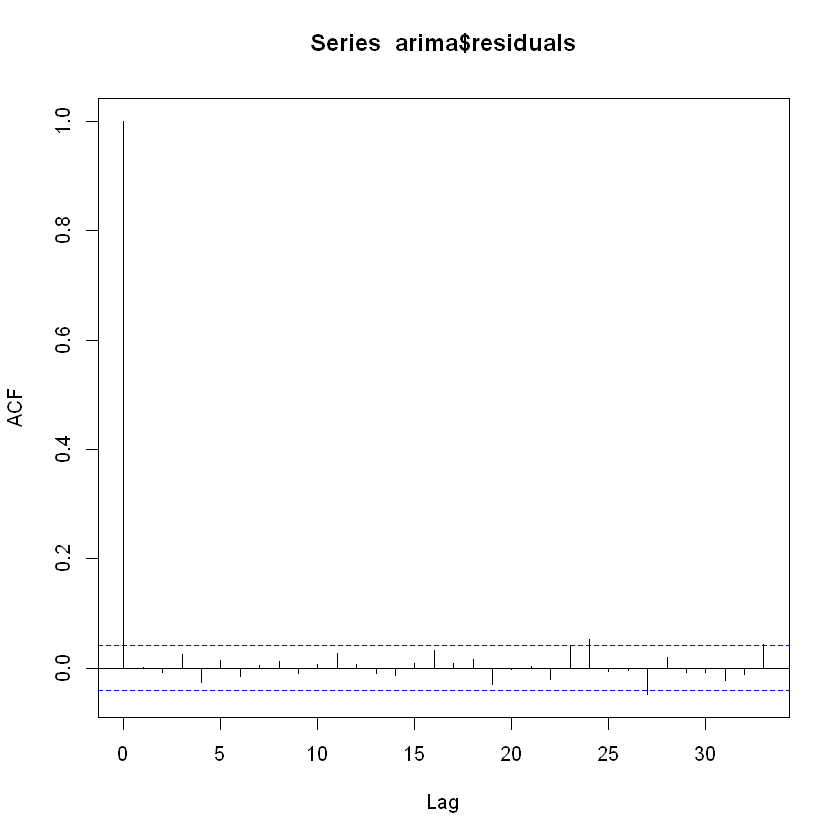

In [91]:
acf(arima$residuals)

In [92]:
Box.test(arima$residuals)


	Box-Pierce test

data:  arima$residuals
X-squared = 0.0015739, df = 1, p-value = 0.9684


## pvalue >0.05 , H0 is accepted => residuals are white noise



### Arima 2 of Model 23

In [93]:
a2=auto.arima(m23$residuals)
a2

Series: m23$residuals 
ARIMA(3,0,2) with zero mean 

Coefficients:
         ar1      ar2     ar3      ma1     ma2
      1.6025  -1.1669  0.2140  -1.2043  0.7310
s.e.  0.0606   0.0805  0.0361   0.0543  0.0605

sigma^2 estimated as 1.879:  log likelihood=-4017.54
AIC=8047.08   AICc=8047.12   BIC=8081.57

In [94]:
arima2=arima(as.numeric(m23$residuals), order=c(3,0,2))
summary(arima2)


Call:
arima(x = as.numeric(m23$residuals), order = c(3, 0, 2))

Coefficients:
         ar1      ar2     ar3      ma1     ma2  intercept
      1.6025  -1.1667  0.2139  -1.2043  0.7308    -0.0010
s.e.  0.0606   0.0806  0.0361   0.0543  0.0605     0.0427

sigma^2 estimated as 1.875:  log likelihood = -4017.54,  aic = 8049.08

Training set error measures:
                       ME     RMSE       MAE      MPE     MAPE      MASE
Training set 0.0003572796 1.369139 0.9432281 112.8193 244.1802 0.8163005
                     ACF1
Training set 0.0008681793


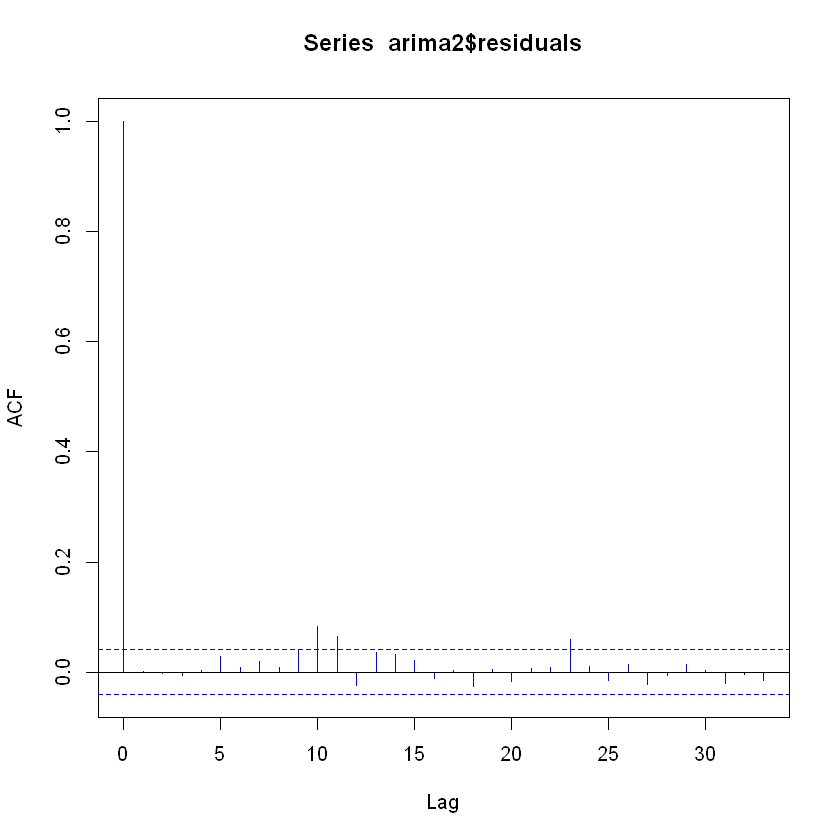

In [95]:
acf(arima2$residuals, col="blue")

In [96]:
Box.test(arima2$residuals)


	Box-Pierce test

data:  arima2$residuals
X-squared = 0.0017472, df = 1, p-value = 0.9667


## H0 accepted there's no significant correlation within residuals 

Warning message in modeldf.default(object):
"Could not find appropriate degrees of freedom for this model."

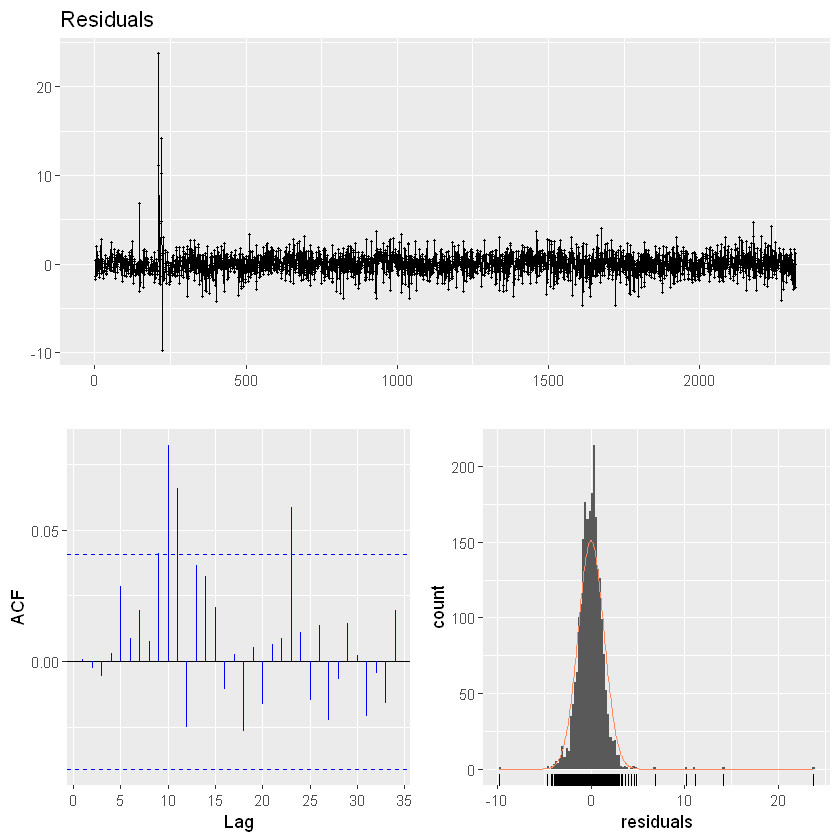

In [97]:
checkresiduals(arima2$residuals, col="blue")

## =>  we have white noise 

## Arima3 of model 33

In [112]:
a3=auto.arima(m33$residuals)
a3

Series: m33$residuals 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
         ar1      ar2      ma1     ma2     mean
      1.5836  -0.8361  -1.1755  0.4788  -0.0037
s.e.  0.0195   0.0196   0.0348  0.0323   0.0248

sigma^2 estimated as 1.381:  log likelihood=-5117
AIC=10246.01   AICc=10246.03   BIC=10282.5

In [113]:
arima3=arima(as.numeric(m3$residuals), order=c(2,0,2))
summary(arima2)


Call:
arima(x = as.numeric(m23$residuals), order = c(3, 0, 2))

Coefficients:
         ar1      ar2     ar3      ma1     ma2  intercept
      1.6025  -1.1667  0.2139  -1.2043  0.7308    -0.0010
s.e.  0.0606   0.0806  0.0361   0.0543  0.0605     0.0427

sigma^2 estimated as 1.875:  log likelihood = -4017.54,  aic = 8049.08

Training set error measures:
                       ME     RMSE       MAE      MPE     MAPE      MASE
Training set 0.0003572796 1.369139 0.9432281 112.8193 244.1802 0.8163005
                     ACF1
Training set 0.0008681793


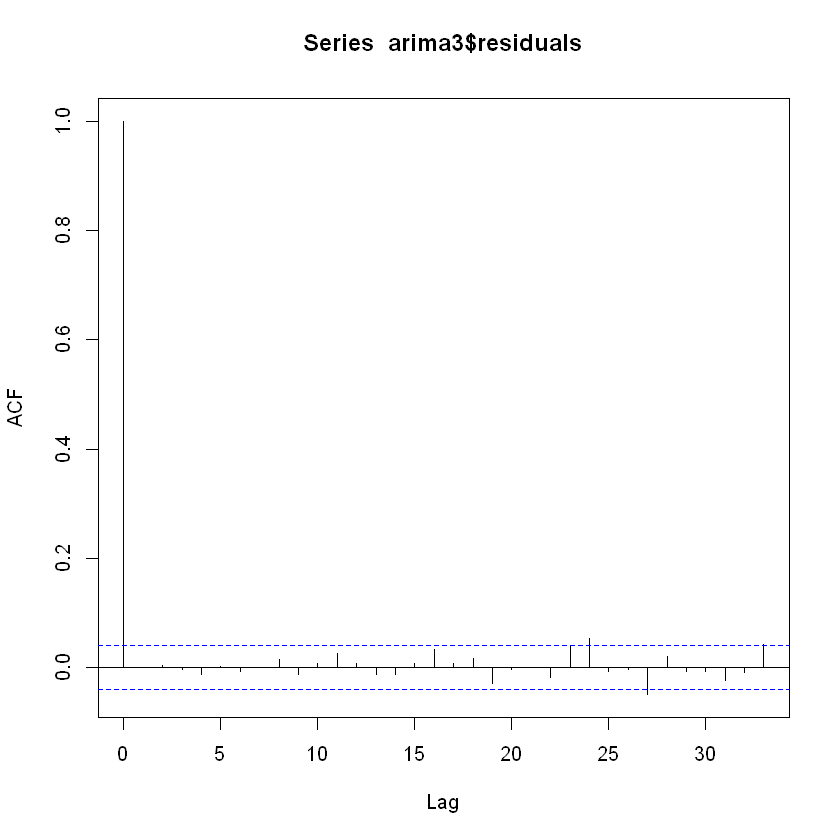

In [114]:
acf(arima3$residuals)

In [101]:
Box.test(arima3$residuals)


	Box-Pierce test

data:  arima3$residuals
X-squared = 0.00035501, df = 1, p-value = 0.985


## H0 accepted => no significant correlation of residuals

Warning message in modeldf.default(object):
"Could not find appropriate degrees of freedom for this model."

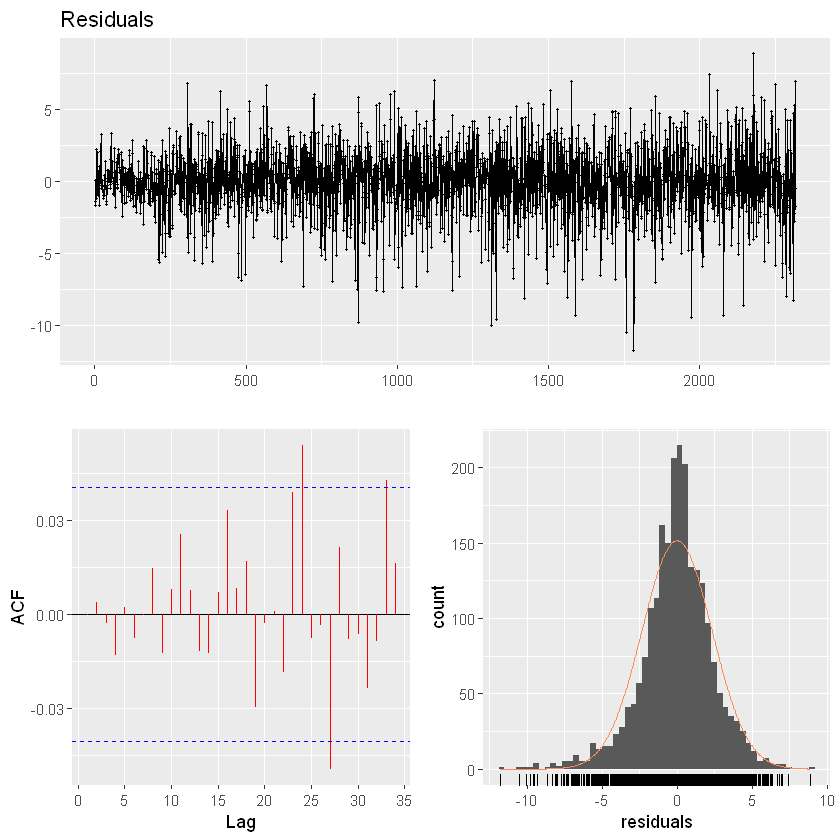

In [102]:
checkresiduals(arima3$residuals, col="red")

## Models + ARIMA 

In [103]:
model3=lm(AT.xts[1:l]~t+I(t^2)+MS+MC+a$fitted)

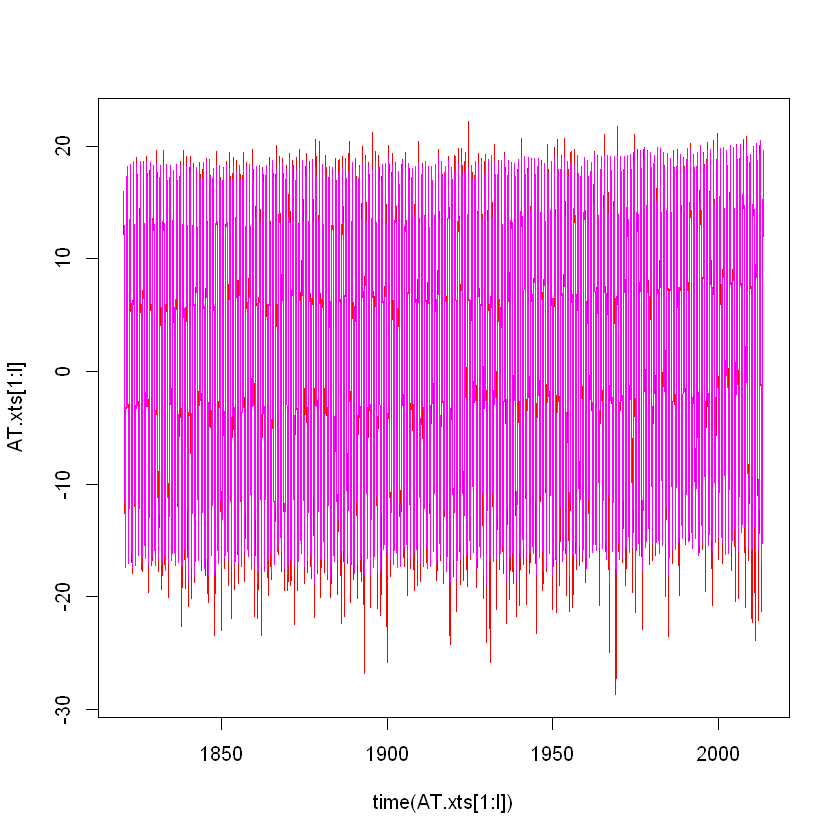

In [104]:
plot(time(AT.xts[1:l]), AT.xts[1:l], type="l", col=2)
points(time(AT.xts[1:l]), fitted(model3), type="l", col=6)

In [105]:
model23=lm(AT.xts2[1:l2]~t2+I(t2^2)+MS2+MC2+a2$fitted)

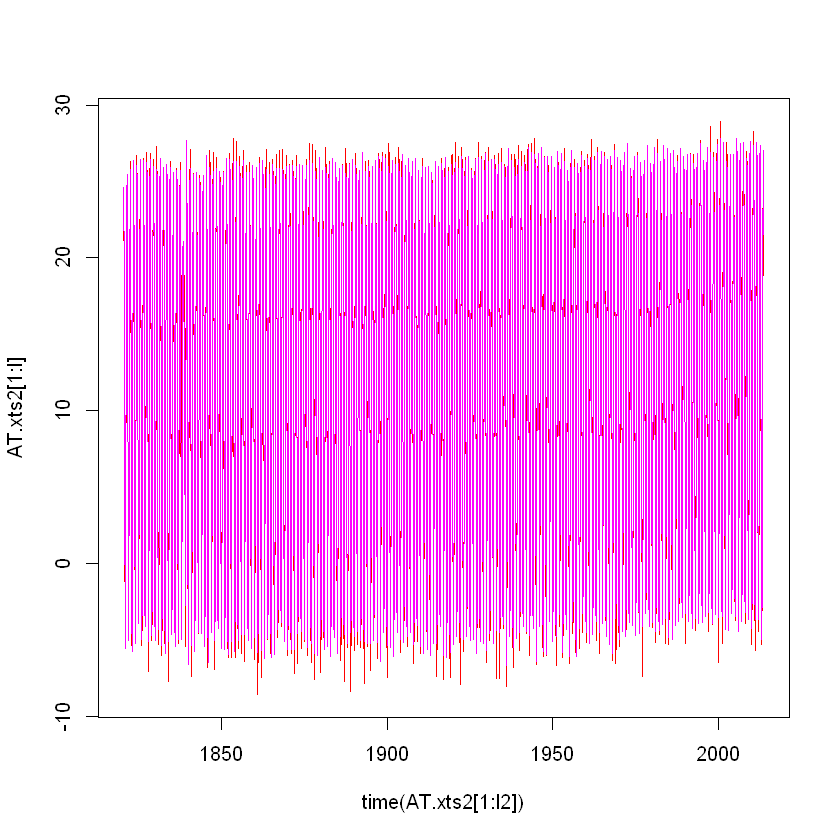

In [106]:
plot(time(AT.xts2[1:l2]), AT.xts2[1:l], type="l", col=2)
points(time(AT.xts2[1:l2]), fitted(model23), type="l", col=6)

In [107]:
model33=lm(AT.xts3[1:l3]~t3+I(t3^2)+MS3+MC3+a3$fitted)

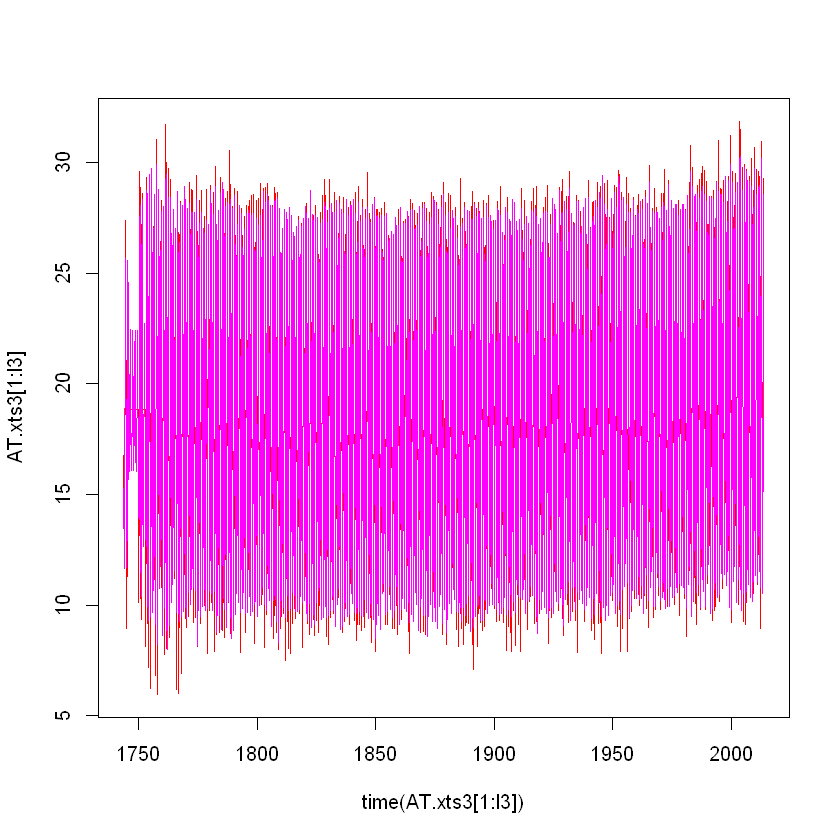

In [108]:
plot(time(AT.xts3[1:l3]), AT.xts3[1:l3], type="l", col=2)
points(time(AT.xts3[1:l3]), fitted(model33), type="l", col=6)

# forecast

Forecast for univariate time series: 
     Lead Forecast  S.E Lower Upper
2319    1 1.451618 2.34 -3.13  6.03
2320    2 0.316945 2.39 -4.37  5.00
2321    3 0.069313 2.39 -4.62  4.76
2322    4 0.015270 2.39 -4.68  4.71
2323    5 0.003476 2.39 -4.69  4.70
2324    6 0.000902 2.39 -4.69  4.69
2325    7 0.000340 2.39 -4.69  4.69
2326    8 0.000218 2.39 -4.69  4.69
2327    9 0.000191 2.39 -4.69  4.69
2328   10 0.000185 2.39 -4.69  4.69
2329   11 0.000184 2.39 -4.69  4.69
2330   12 0.000184 2.39 -4.69  4.69
2331   13 0.000183 2.39 -4.69  4.69
2332   14 0.000183 2.39 -4.69  4.69
2333   15 0.000183 2.39 -4.69  4.69
2334   16 0.000183 2.39 -4.69  4.69
2335   17 0.000183 2.39 -4.69  4.69
2336   18 0.000183 2.39 -4.69  4.69
2337   19 0.000183 2.39 -4.69  4.69
2338   20 0.000183 2.39 -4.69  4.69
2339   21 0.000183 2.39 -4.69  4.69
2340   22 0.000183 2.39 -4.69  4.69
2341   23 0.000183 2.39 -4.69  4.69
2342   24 0.000183 2.39 -4.69  4.69
2343   25 0.000183 2.39 -4.69  4.69
2344   26 0.000183 2.39 -4

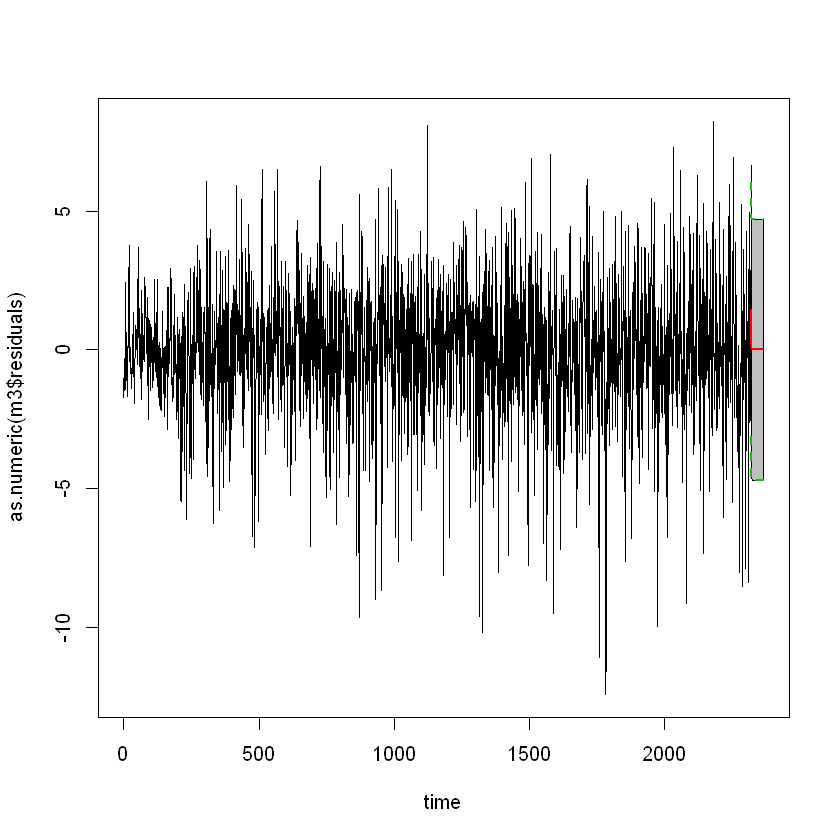

In [109]:
forecast(arima,48)

Forecast for univariate time series: 
     Lead  Forecast  S.E Lower Upper
2319    1 -0.895321 1.37 -3.58  1.79
2320    2 -0.411926 1.47 -3.30  2.48
2321    3 -0.127389 1.50 -3.07  2.81
2322    4  0.084597 1.50 -2.86  3.03
2323    5  0.195745 1.50 -2.75  3.14
2324    6  0.187401 1.51 -2.77  3.15
2325    7  0.089698 1.52 -2.88  3.06
2326    8 -0.033363 1.52 -3.01  2.94
2327    9 -0.118364 1.52 -3.09  2.85
2328   10 -0.131902 1.52 -3.11  2.85
2329   11 -0.080751 1.52 -3.06  2.90
2330   12 -0.001166 1.52 -2.99  2.98
2331   13  0.063796 1.52 -2.92  3.05
2332   14  0.085987 1.52 -2.90  3.07
2333   15  0.062782 1.52 -2.93  3.05
2334   16  0.013599 1.53 -2.98  3.00
2335   17 -0.033396 1.53 -3.02  2.96
2336   18 -0.056289 1.53 -3.05  2.93
2337   19 -0.048665 1.53 -3.04  2.94
2338   20 -0.019792 1.53 -3.01  2.97
2339   21  0.012687 1.53 -2.98  3.00
2340   22  0.032678 1.53 -2.96  3.02
2341   23  0.032998 1.53 -2.96  3.03
2342   24  0.017134 1.53 -2.98  3.01
2343   25 -0.004385 1.53 -3.00  2.99


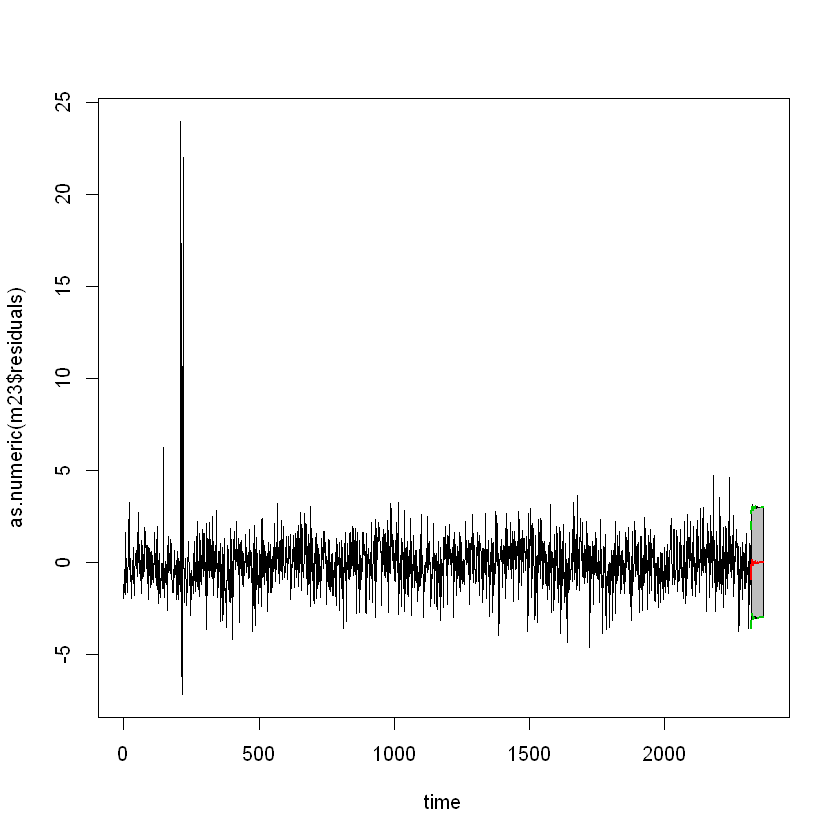

In [110]:
forecast(arima2, 48)

Forecast for univariate time series: 
     Lead  Forecast  S.E Lower Upper
2319    1  1.48e+00 2.33 -3.10  6.05
2320    2  2.04e-01 2.39 -4.48  4.89
2321    3  2.59e-01 2.39 -4.43  4.95
2322    4 -4.83e-02 2.39 -4.74  4.64
2323    5  7.70e-02 2.39 -4.61  4.77
2324    6 -3.85e-02 2.39 -4.73  4.65
2325    7  3.22e-02 2.39 -4.66  4.72
2326    8 -1.98e-02 2.39 -4.71  4.67
2327    9  1.53e-02 2.39 -4.68  4.71
2328   10 -9.38e-03 2.39 -4.70  4.68
2329   11  7.60e-03 2.39 -4.68  4.70
2330   12 -4.21e-03 2.39 -4.70  4.69
2331   13  3.97e-03 2.39 -4.69  4.70
2332   14 -1.70e-03 2.39 -4.69  4.69
2333   15  2.23e-03 2.39 -4.69  4.69
2334   16 -4.98e-04 2.39 -4.69  4.69
2335   17  1.39e-03 2.39 -4.69  4.69
2336   18  8.17e-05 2.39 -4.69  4.69
2337   19  9.89e-04 2.39 -4.69  4.69
2338   20  3.60e-04 2.39 -4.69  4.69
2339   21  7.96e-04 2.39 -4.69  4.69
2340   22  4.94e-04 2.39 -4.69  4.69
2341   23  7.03e-04 2.39 -4.69  4.69
2342   24  5.58e-04 2.39 -4.69  4.69
2343   25  6.59e-04 2.39 -4.69  4.69


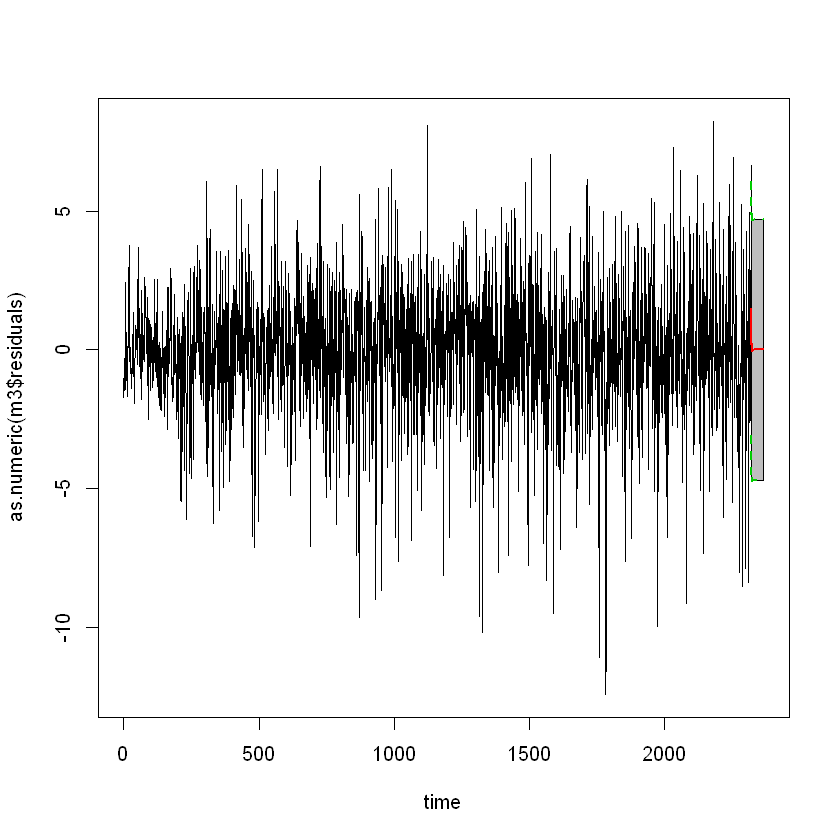

In [111]:
forecast(arima3, 48)